<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 1 Import the needed libraries
    

    
</div>

In [1]:
# initials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

#Feature Selectiom
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from skfeature.function.similarity_based import fisher_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LassoCV, Ridge, RidgeCV, Lasso
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Sampling
from imblearn.over_sampling import SMOTE

# Scaler
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Models
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, make_scorer, accuracy_score, f1_score, log_loss, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_recall_curve, confusion_matrix


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'
from joblib import Parallel, delayed
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 2. Initial Data Understanding
    

    
</div>

In [3]:
df_train = pd.read_csv('train_data.csv')
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
df_train.shape

(593471, 33)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

There were claim identifiers with 7 or 9 digits. However, the ones with 9 digits were all missing values, so the group kept only the claims with identifiers that had 7 digits.

In [6]:
df_train["Claim Identifier"] = df_train["Claim Identifier"].astype(str) # convert column to type "str" in order to use length()
df_train["Claim Identifier"].str.len().value_counts()                   # check how it´s divided between 7 or 9 digits

Claim Identifier
7    574026
9     19445
Name: count, dtype: int64

In [7]:
id9digits = df_train[df_train["Claim Identifier"].str.len() == 9].isnull().sum() # counting missing values in all columns knowing that are 19445 rows where ID is 9 digits
id9digits

Accident Date                         19445
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   19445
Birth Year                            19445
C-2 Date                              19445
C-3 Date                              19445
Carrier Name                          19445
Carrier Type                          19445
Claim Identifier                          0
Claim Injury Type                     19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                    19445
Gender                                19445
IME-4 Count                           19445
Industry Code                         19445
Industry Code Description             19445
Medical Fee Region                    19445
OIICS Nature of Injury Descripti

In [8]:
df_train = df_train[df_train["Claim Identifier"].str.len() == 7] # maintain only 7 digits values
df_train["Claim Identifier"].str.len().value_counts()

Claim Identifier
7    574026
Name: count, dtype: int64

In [9]:
df_train["Claim Identifier"] = df_train["Claim Identifier"].astype('Int64') # convert column to type "int" in order to use it as index.

In [10]:
df_train["Claim Injury Type"].value_counts() # target variable

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [11]:
df_train["Age at Injury"].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

In [12]:
df_train["WCB Decision"].unique() #WCB Decision - Decision of the WCB relative to the claim. Drop this column because only have one value

array(['Not Work Related'], dtype=object)

In [13]:
df_train["Zip Code"].unique()

array(['13662', '14569', '12589', ..., 'G9B0Y', '15143', '07122'],
      dtype=object)

In [14]:
df_train["Medical Fee Region"].unique() # approximate region where the injured worker would receive medical service.

array(['I', 'II', 'IV', 'UK', 'III'], dtype=object)

In [15]:
df_train["COVID-19 Indicator"].value_counts() # Indication that the claim may be associated with COVID-19.
### N means No and Y means Yes

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

In [16]:
df_train["Carrier Name"].nunique() #There are 2046 insurance providers (carriers) responsible for providing workers’ compensation coverage to the injured worker’s employer

2046

In [17]:
df_train["Alternative Dispute Resolution"].value_counts() # N means No and Y means Yes, U means Unknown

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [18]:
df_train["Attorney/Representative"].value_counts() # N means No and Y means Yes - transform to binary

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [19]:
df_train["Carrier Type"].value_counts() # Type of primary insurance provider responsible for providing workers’ compensation coverage

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [20]:
df_train["Gender"].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [ ]:
df_train["WCIO Part Of Body Code"].unique() # check the value -9 in the column "WCIO Part Of Body Code"

array([62., 38., 10., 36., 60., 14., 55., 53., 37., 42., 61., 54., 51.,
       52., 17., 34., 23., 35., 18., 31., 25., 56., 32., 30., 90., 91.,
       20., 44., 39., 13., 50., 43., 33., -9., 22., 41., 11., 57., 19.,
       nan, 16., 66., 40., 99., 65., 46., 15., 58., 48., 49., 21., 63.,
       12., 45., 64., 24., 47., 26.])

In [22]:
df_train[df_train["WCIO Part Of Body Code"]== -9].head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
128,2019-12-19,42.0,N,2020-01-01,Y,1093.74,1977.0,2019-12-31,2020-01-14,PUBLIC EMPLOYERS RISK MGMT.,3A. SELF PUBLIC,5393974,4. TEMPORARY,DUTCHESS,N,ALBANY,2020-08-27,M,6.0,92.0,PUBLIC ADMINISTRATION,II,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",52.0,STRAIN OR TEAR,-9.0,MULTIPLE,12578,1.0,Not Work Related,6.0
235,2019-09-13,36.0,N,2020-01-02,Y,1500.00,1983.0,2020-02-07,2019-12-27,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,5393785,5. PPD SCH LOSS,SUFFOLK,N,HAUPPAUGE,2020-03-12,F,3.0,92.0,PUBLIC ADMINISTRATION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",10.0,CONTUSION,-9.0,MULTIPLE,11704,0.0,Not Work Related,5.0
790,2019-12-12,57.0,N,2020-01-03,Y,764.35,1962.0,2020-01-03,2020-01-09,PROPERTY AND CASUALTY,1A. PRIVATE,5395679,5. PPD SCH LOSS,BRONX,N,NYC,2020-02-18,M,NaN,31.0,MANUFACTURING,IV,NaN,29.0,ON SAME LEVEL,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,10466,0.0,Not Work Related,4.0
1006,2018-01-06,50.0,N,2020-01-03,N,0.00,1967.0,2020-01-03,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5395006,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,UK,NaN,97.0,REPETITIVE MOTION,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",-9.0,MULTIPLE,07726,0.0,Not Work Related,0.0
2276,2019-12-26,33.0,N,2020-01-06,Y,670.00,NaN,2020-01-06,2020-12-08,"SYRACUSE, CITY OF",3A. SELF PUBLIC,5396338,4. TEMPORARY,ONONDAGA,N,SYRACUSE,2021-02-16,M,9.0,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,13208,0.0,Not Work Related,1.0


In [23]:
df_train["WCIO Part Of Body Description"].unique()

array(['BUTTOCKS', 'SHOULDER(S)', 'MULTIPLE HEAD INJURY', 'FINGER(S)',
       'LUNGS', 'EYE(S)', 'ANKLE', 'KNEE', 'THUMB', 'LOWER BACK AREA',
       'ABDOMEN INCLUDING GROIN', 'LOWER LEG', 'HIP', 'UPPER LEG',
       'MOUTH', 'WRIST', 'SPINAL CORD', 'HAND', 'SOFT TISSUE',
       'UPPER ARM', 'FOOT', 'ELBOW', 'MULTIPLE UPPER EXTREMITIES',
       'MULTIPLE BODY PARTS (INCLUDING BODY',
       'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS', 'MULTIPLE NECK INJURY',
       'CHEST', 'WRIST (S) & HAND(S)', 'EAR(S)',
       'MULTIPLE LOWER EXTREMITIES', 'DISC', 'LOWER ARM', 'MULTIPLE',
       'UPPER BACK AREA', 'SKULL', 'TOES', 'FACIAL BONES', nan, 'TEETH',
       'NO PHYSICAL INJURY', 'MULTIPLE TRUNK', 'WHOLE BODY',
       'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'PELVIS',
       'NOSE', 'GREAT TOE', 'INTERNAL ORGANS', 'HEART', 'VERTEBRAE',
       'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', 'BRAIN',
       'SACRUM AND COCCYX', 'ARTIFICIAL APPLIANCE', 'LARYNX', 'TRACHEA'],
      dtype=ob

In [24]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)                                   # count the number of missing values in each column and sort them in descending order
missing_percentage = (missing_values / len(df_train)) * 100                                             # calculate the percentage of missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})       # create a dataframe to store the missing values and their percentage
missing_data.style.applymap(lambda x: 'background-color: red' if x > 10 else '', subset=['Percentage']) # highlight missing values above 10%

,Missing Values,Percentage
OIICS Nature of Injury Description,574026,100.000000
IME-4 Count,441223,76.864637
First Hearing Date,423228,73.729761
C-3 Date,386781,67.380397
Birth Year,29078,5.065624
Average Weekly Wage,28651,4.991237
Zip Code,28637,4.988798
WCIO Part Of Body Description,17082,2.975823
WCIO Part Of Body Code,17082,2.975823
WCIO Nature of Injury Description,15657,2.727577


There are 4 variables with a significant number of missing values, however we will see that 3 of them are actually relevant for the predictions if we assume that missing values as don´t exist:
- C-3 Date - 68.4 %
- First Hearing Date - 74.6%
- ME-4 Count - 77.6%
- OIICS Nature of Injury Description - 100%
- The rest of the variables have a percentage of missing values that go from 1% to 5% wich is acceptable and we can handle these with imputation

In [25]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,574026,897,2020-03-06,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574026,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for duplicates

In [26]:
df_train[df_train.duplicated(subset=["Claim Identifier"], keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


Set the column "Claim Identifier" as the index

In [27]:
df_train.set_index('Claim Identifier', inplace = True)

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 3. Pre-Processing (Correct datatypes and drop irrelevant columns)
    

    
</div>

Drop the columns with a significant number of missing values and columns that are not relevant for the analysis (WCB Decision)

In [28]:
df_train.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0


In [29]:
df_train["WCB Decision"].value_counts() # furteher ahead we could try to predict the wcb decision by occupational disease, was it or not work related

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [30]:
columns_to_drop =["OIICS Nature of Injury Description", "WCB Decision"]
for c in columns_to_drop:
    df_train = df_train.drop([c], axis=1) # axis = 1 drop columns

Changing the Data Type of the columns : "Accident Date", "Assembly Date", "C-2 Date" to datetime

In [31]:
columns_to_date_time=["Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]
for i in columns_to_date_time:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce') #coerce will force an out-of-bounds date to NaT, in case of any error 

Changing the Data Type of the columns : "Age at Injury", "Birth Year", "Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "Number of Dependents" to numeric

In [32]:
lista=["Age at Injury", "Birth Year", "Number of Dependents", "WCIO Part Of Body Code", "WCIO Nature of Injury Code", "WCIO Cause of Injury Code", "Industry Code", "Agreement Reached"]
for i in lista:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

We also get the Zip Codes csv to match with ours in order to reduce cardinality like in the Binary one.

In [33]:
zip_match = pd.read_csv("Zip_Codes.csv", delimiter=';')
zip_match.head(3)
# Create a new column with only the numeric part of the Zip Code
zip_match['Zip Code Numbers'] = zip_match['Zip Code'].str.replace(r'\D', '', regex=True)

# Display the DataFrame
zip_match.head(2)

,Zip Code,County,Zip Code Numbers
0,ZIP Code 00501,Suffolk,00501
1,ZIP Code 00544,Suffolk,00544


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 4. Functions that are long - MultiClass Prediction (shorts ones are together in data cleaning to understand well)
    

    
</div>

<a class="anchor" id="3rd-bullet">

### Age Group:
    
</a>

Define a function to categorize to reduce the distribution of age and keep both features to further choose the best performer in feature selection.


In [34]:
def categorize_age_group(x):
    if 1 <= x <= 15: # to work after replace the zero ages with the median (the ones we don´t have birth year)
        return 0
    elif 16 <= x <= 35:
        return 1
    elif 36 <= x <= 57:
        return 2
    elif 58 <= x <= 76:
        return 3
    else:
        return 4

<a class="anchor" id="3rd-bullet">

### County of Injury:
    
</a>

We also define groups for counties based on https://www.ny.gov/counties to see if that would help: <br>
Anyway, we kept both columns (initial andm new)

In [35]:
region_groups = {
    'Adirondacks': ['CLINTON', 'ESSEX', 'FRANKLIN', 'HAMILTON', 'LEWIS', 'WARREN'],
    'Capital_Saratoga': ['ALBANY', 'FULTON', 'RENSSELAER', 'SARATOGA', 'SCHENECTADY', 'WASHINGTON'],
    'Catskills': ['DELAWARE', 'GREENE', 'SULLIVAN'],
    'Central_New_York': ['BROOME', 'CHENANGO', 'HERKIMER', 'MADISON', 'MONTGOMERY', 'ONEIDA', 'OTSEGO', 'SCHOHARIE'],
    'Chautauqua': ['ALLEGANY', 'CATTARAUGUS', 'CHAUTAUQUA'],
    'Finger_Lakes': ['CAYUGA', 'CHEMUNG', 'CORTLAND', 'LIVINGSTON', 'MONROE', 'ONONDAGA', 'ONTARIO', 'SCHUYLER', 'SENECA', 'STEUBEN', 'TIOGA', 'TOMPKINS', 'WAYNE', 'YATES'],
    'Greater_Niagara': ['ERIE', 'GENESEE', 'NIAGARA', 'ORLEANS', 'WYOMING'],
    'Hudson_Valley': ['COLUMBIA', 'DUTCHESS', 'ORANGE', 'PUTNAM', 'ROCKLAND', 'ULSTER', 'WESTCHESTER'],
    'Long_Island': ['NASSAU', 'SUFFOLK'],
    'New_York_City': ['BRONX', 'KINGS', 'NEW YORK', 'QUEENS', 'RICHMOND'],
    'Thousand_Islands_Seaway': ['JEFFERSON', 'OSWEGO', 'ST. LAWRENCE'],
    'Unknown': ['UNKNOWN']
}

# Create a reverse mapping dictionary
county_to_region = {county: region for region, counties in region_groups.items() for county in counties}

# Function to map county to region
def map_county_to_region(county):
    return county_to_region.get(county.upper(), 'Unknown')

<a class="anchor" id="3rd-bullet">

### Body Part Group:
    
</a>

In [36]:
def categorize_body_part_description(code):
    if 10 <= code <= 19:
        return 'Head'
    elif 20 <= code <= 29:
        return 'Neck'
    elif 30 <= code <= 39:
        return 'Upper Extremities'
    elif (40 <= code <= 49) or (60 <= code <= 63) or code == 51:
        return 'Trunk'
    elif 50 <= code <= 59:
        return 'Lower Extremities'
    elif code == 91:
        return 'Body Systems'
    elif code == 64:
        return 'ARTIFICIAL APPLIANCE'
    elif code == 65:
        return 'INSUFFICIENT INFO'
    elif code == 66:
        return 'NO PHYSICAL INJURY'
    elif 67 <= code <= 99 or code == -9:
        return 'Multiple Body Parts'
    else:
        return 'Not_applied'

<a class="anchor" id="3rd-bullet">

### Cause Injury Group:
    
</a>

In [37]:
def categorize_cause_injury_description(code):
    if code == 86:
        return 'Fires and Explosions'
    elif (12 <= code <= 13) or (16 <= code <= 20) or (68 <= code <= 70) or (74 <= code <= 76) or (78 <= code <= 81) or code == 87 or code == 95:
        return 'Contact with Objects and Equipment'
    elif 25 <= code <= 33:
        return 'Fall, Slip or Trip Injury'
    elif 40 <= code <= 50:
        return 'Transportation Incidents'
    elif (1 <= code <= 11) or (14 <= code <= 15) or code == 52 or code == 82 or code == 84:
        return 'Exposure to Harmful Substances or Environments'
    elif (53 <= code <= 67) or code == 97 or code == 77 or code == 94:
        return 'Overexertion and Bodily Reaction'
    elif code == 85 or (89 <= code <= 90) or code == 93:
        return 'Violence and Other Injuries by Persons or Animals'
    elif code == 98:
        return 'Cumulative'
    elif code == 88:
        return 'Natural Disasters'
    elif code == 83 or code == 91:
        return 'Pandemic'
    elif code == 96:
        return 'Terrorism'
    elif code == 99:
        return 'Miscellaneous'
    else:
        return "Not_applied"

<a class="anchor" id="3rd-bullet">

### Industry Group:
    
</a>

In [38]:
def categorize_industry_description_final(code):
    if code == 11:
        return "AGRICULTURE, FORESTRY, FISHING AND HUNTING"
    elif 23 <= code <= 24:
        return "Construction"
    elif 30 <= code <= 33:
        return "Manufacturing"
    elif 42 <= code <= 45:
        return "Trade"
    elif 48 <= code <= 49:
        return "Transporting and Warehousing"
    elif code == 62:
        return "HEALTH CARE AND SOCIAL ASSISTANCE"
    elif 50 <= code <= 81 or code == 22:
        return "Services"
    elif code == 92:
        return "Public Sector"
    elif code == 21:
        return 'MINING'
    else:
        return 'Unknown'

<a class="anchor" id="3rd-bullet">

### Nature of Injury Group:
    
</a>

In [39]:
def categorize_nature_injury_description_final(code):
    # DISEASES AND DISORDERS OF BODY SYSTEMS
    if code in [3, 16, 41, 55, 58, 60, 61, 62, 63, 64, 65, 68, 71, 72, 78, 80]:   # Mapping based on codes from your list
        return 'DISEASES AND DISORDERS OF BODY SYSTEMS'

    # Traumatic Injuries and Disorders
    elif code in [2, 4, 7, 10, 13, 19, 22, 25, 28, 32, 34, 40, 42, 43, 46, 47, 49, 52, 53, 54, 59, 67, 70]:  # Codes for traumatic injuries
        return 'Traumatic Injuries and Disorders'
    
    # EXPOSURE TO HARMFUL SUBSTANCES OR ENVIRONMENTS 
    elif code in [30, 31, 38]:  # Codes for harmful substances
        return 'EXPOSURE TO HARMFUL SUBSTANCES OR ENVIRONMENTS'

    # INFECTIOUS AND PARASITIC DISEASES  
    elif code in [36, 66, 73, 79, 83]:  # Codes for infectous diseases
        return 'INFECTIOUS AND PARASITIC DISEASES'

    # SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS 
    elif code in [37]:  # Codes for ill-defined conditions
        return 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS'
    
    # OTHER DISEASES, CONDITIONS, AND DISORDERS
    elif code in [69, 75, 76, 77]:
        return 'OTHER DISEASES, CONDITIONS, AND DISORDERS' 
    
    # NEOPLASMS, TUMORS, AND CANCERS
    elif code in [74]:
        return 'NEOPLASMS, TUMORS, AND CANCERS'

    # MULTIPLE DISEASES, CONDITIONS, AND DISORDERS 
    elif code in [90, 91]:
        return 'MULTIPLE DISEASES, CONDITIONS, AND DISORDERS'
    
    elif code == 1:
        return 'No Psysical Injury'
    
    else:
        return 'Not_applied'  # Unclassified or unknown

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 5. Data Cleaning
    

    
</div>

<a class="anchor" id="3rd-bullet">

### Initial settings:
    
</a>

In [40]:
df_toclean = df_train.copy()

In [41]:
df_toclean.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,N,2020-01-01,N,0.00,1988,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44,RETAIL TRADE,I,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,1
5393091,2019-08-30,46,N,2020-01-01,Y,1745.93,1973,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23,CONSTRUCTION,I,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1,4


In [42]:
df_toclean["Agreement Reached"].dtype

Int64Dtype()

Turn the target variable into numeric

In [43]:
df_toclean['claim_injury_code'] = df_toclean['Claim Injury Type'].str.split('. ').str[0]
df_toclean['claim_injury_code'] = pd.to_numeric(df_toclean['claim_injury_code'], errors='coerce').astype('Int64')
df_toclean.drop(columns = {'Claim Injury Type'}, inplace=True)

In [44]:
# Split the data into features and target
X = df_toclean.drop(columns=['claim_injury_code'], axis=1)
y = df_toclean['claim_injury_code']

In [45]:
y.value_counts()

claim_injury_code
2    291078
4    148507
3     68906
5     48280
1     12477
6      4211
8       470
7        97
Name: count, dtype: Int64

**Since we have a large dataset 70% is adequate for the model training, so we split the the dataset into train (70%) and validation (30%)**

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y,       # stratify to keep the same proportion of classes in the train and validation sets
                                                  shuffle = True)

Prepare the test dataset at the same time

In [47]:
## split the test dataset into X_test and y_test which y_test is the columns who needs to be created as empty
X_test = pd.read_csv('X_test_agreement.csv') # this already contains Agreement Reached on test set.
y_test = pd.DataFrame(columns = ['claim_injury_code'])

In [48]:
# set the claim identifier as index in the test dataset
X_test.set_index('Claim Identifier', inplace=True)

In [49]:
X_test.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Agreement Reached
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1,0
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaN,F,NaN,45.0,RETAIL TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1,0


Drop irrelevant columns and change datatypes in the test dataset

In [50]:
columns_to_drop =["OIICS Nature of Injury Description"]
for c in columns_to_drop:
    X_test = X_test.drop([c], axis=1)

# Changing the data type of the columns : "Accident Date", "Assembly Date", "C-2 Date" to datetime
columns_to_date_time=["Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]
for i in columns_to_date_time:
    X_test[i] = pd.to_datetime(X_test[i], errors='coerce') #coerce will force an out-of-bounds date to NaT, in case of any error 

# Changing the data type of the columns : "Age at Injury", "Birth Year", "Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "Number of Dependents" to numeric
lista=["Age at Injury", "Birth Year", "Number of Dependents", "WCIO Part Of Body Code", "WCIO Nature of Injury Code", "WCIO Cause of Injury Code", "Industry Code", 'Agreement Reached']
for i in lista:
    X_test[i] = pd.to_numeric(X_test[i], errors='coerce').astype('Int64')

In [51]:
# Ensure the columns in X_test match the order in X_train
X_test = X_test[X_train.columns] 
# This was just to swap Number Dependents with Agreement Reached. By default on initial train "Agreement" was 1st. However on test, due to prediction, was last column.

In [52]:
X_test.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaT,M,NaN,48,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,0,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaT,F,NaN,45,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,0,1


<a class="anchor" id="3rd-bullet">

## Missing Values:
    
</a>

### Birth Year

In [53]:
len(X_train[X_train['Age at Injury'] == 0])

3811

In [54]:
## when 'Age at Injury' is 0 and 'Birth Year' is also 0 we replace 0 with NaN in Age at Injury
X_train.loc[(X_train['Age at Injury'] == 0) & (X_train['Birth Year'] == 0), 'Age at Injury'] = np.nan
X_val.loc[(X_val['Age at Injury'] == 0) & (X_val['Birth Year'] == 0), 'Age at Injury'] = np.nan
X_test.loc[(X_test['Age at Injury'] == 0) & (X_test['Birth Year'] == 0), 'Age at Injury'] = np.nan

## when 'Age at Injury' is 0 but 'Birth Year' is not 0 we calculate the age based on the 'Birth Year'
X_train.loc[(X_train['Age at Injury'] == 0) & (X_train['Birth Year'] != 0), 'Age at Injury'] = X_train['Accident Date'].dt.year - X_train['Birth Year']
X_val.loc[(X_val['Age at Injury'] == 0) & (X_val['Birth Year'] != 0), 'Age at Injury'] = X_val['Accident Date'].dt.year - X_val['Birth Year']
X_test.loc[(X_test['Age at Injury'] == 0) & (X_test['Birth Year'] != 0), 'Age at Injury'] = X_test['Accident Date'].dt.year - X_test['Birth Year']

In [55]:
# Replace Age at Injury with the median if Age at Injury is Nan
median_age = X_train['Age at Injury'].median()
X_train.loc[X_train['Age at Injury'].isna(), 'Age at Injury'] = median_age
X_val.loc[X_val['Age at Injury'].isna(), 'Age at Injury'] = median_age
X_test.loc[X_test['Age at Injury'].isna(), 'Age at Injury'] = median_age

# Replace Age at Injury with the median if Age at Injury is 0 and Birth Year is Nan
X_train.loc[(X_train['Age at Injury'] == 0) & (X_train['Birth Year'].isna()), 'Age at Injury'] = median_age
X_val.loc[(X_val['Age at Injury'] == 0) & (X_val['Birth Year'].isna()), 'Age at Injury'] = median_age
X_test.loc[(X_test['Age at Injury'] == 0) & (X_test['Birth Year'].isna()), 'Age at Injury'] = median_age

#drop the birth year column because we already have the age at injury column - we can calculate the birth year from the age at injury
X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
X_test.drop(columns=['Birth Year'], inplace=True)

In [56]:
# apply the def function to categorize into groups:
X_train['Age_Category'] = X_train['Age at Injury'].apply(categorize_age_group)
X_val['Age_Category'] = X_val['Age at Injury'].apply(categorize_age_group)
X_test['Age_Category'] = X_test['Age at Injury'].apply(categorize_age_group)

X_train['Age_Category'].value_counts()

# Keep both features to further choose the best performer in feature selection.

Age_Category
2    194128
1    142289
3     63776
4      1469
0       156
Name: count, dtype: int64

On original "Age at Injury" will try to deal with outliers after seen on EDA that people above 90 doesn´t really behave in a special way...

In [57]:
# Calculate Q1 and Q3 for 'Age at Injury' where values are greater than 0
q1 = X_train['Age at Injury'].quantile(0.25)
q3 = X_train['Age at Injury'].quantile(0.75)

print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)

# Calculate IQR and upper bound
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print("Upper bound:", upper_bound)

# Cap values above the upper bound in 'Age at Injury'
X_train['Age at Injury'] = X_train['Age at Injury'].apply(lambda x: min(x, upper_bound))
X_val['Age at Injury'] = X_val['Age at Injury'].apply(lambda x: min(x, upper_bound))
X_test['Age at Injury'] = X_test['Age at Injury'].apply(lambda x: min(x, upper_bound))

# Verify maximum value in capped 'Age at Injury' in training set
print("Max value in 'Age at Injury' after capping:", X_train['Age at Injury'].max())

Q1 (25th percentile): 31.0
Q3 (75th percentile): 54.0
Upper bound: 88.5
Max value in 'Age at Injury' after capping: 88.5


<a class="anchor" id="3rd-bullet">

## Dates Transformations:
    
</a>

### C-2, C-3, Hearing and Accident Dates - Creat Binary columns

In [58]:
X_train['Hearing_Held'] = X_train['First Hearing Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_val['Hearing_Held'] = X_val['First Hearing Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_test['Hearing_Held'] = X_test['First Hearing Date'].apply(lambda x: 1 if pd.notnull(x) else 0)

X_train['C3_Received'] = X_train['C-3 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_val['C3_Received'] = X_val['C-3 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_test['C3_Received'] = X_test['C-3 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)

X_train['C2_Received'] = X_train['C-2 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_val['C2_Received'] = X_val['C-2 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_test['C2_Received'] = X_test['C-2 Date'].apply(lambda x: 1 if pd.notnull(x) else 0)

X_train['Accident_date_present'] = X_train['Accident Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_val['Accident_date_present'] = X_val['Accident Date'].apply(lambda x: 1 if pd.notnull(x) else 0)
X_test['Accident_date_present'] = X_test['Accident Date'].apply(lambda x: 1 if pd.notnull(x) else 0)

X_train.drop(columns=["First Hearing Date"], inplace=True)
X_val.drop(columns=["First Hearing Date"], inplace=True)
X_test.drop(columns=["First Hearing Date"], inplace=True)

### Getting months and years from accident and year from assembly dates

Regarding year from assembly and accident dates, be careful for data leakage due to not having 2024 in train data:

In [59]:
# Calculate the mode for the day of week, month and year
mode_month = X_train['Accident Date'].dt.month.mode()[0]
mode_year = X_train['Accident Date'].dt.year.mode()[0]
mode_DOW = X_train['Accident Date'].dt.dayofweek.mode()[0]
mode_day = X_train['Accident Date'].dt.day.mode()[0]

# Extract the month from 'Accident Date' and fill missing values with the mode month
X_train['Accident_Month'] = X_train['Accident Date'].dt.month.fillna(mode_month).astype(int)
X_val['Accident_Month'] = X_val['Accident Date'].dt.month.fillna(mode_month).astype(int)
X_test['Accident_Month'] = X_test['Accident Date'].dt.month.fillna(mode_month).astype(int)

# Extract the year from 'Accident Date' and fill missing values with the mode year
X_train['Accident_Year'] = X_train['Accident Date'].dt.year.fillna(mode_year).astype(int)
X_val['Accident_Year'] = X_val['Accident Date'].dt.year.fillna(mode_year).astype(int)
X_test['Accident_Year'] = X_test['Accident Date'].dt.year.fillna(mode_year).astype(int)

X_train['Accident_DOW'] = X_train['Accident Date'].dt.dayofweek.fillna(mode_DOW).astype(int)
X_val['Accident_DOW'] = X_val['Accident Date'].dt.dayofweek.fillna(mode_DOW).astype(int)
X_test['Accident_DOW'] = X_test['Accident Date'].dt.dayofweek.fillna(mode_DOW).astype(int)

X_train['Accident_Day'] = X_train['Accident Date'].dt.day.fillna(mode_day).astype(int)
X_val['Accident_Day'] = X_val['Accident Date'].dt.day.fillna(mode_day).astype(int)
X_test['Accident_Day'] = X_test['Accident Date'].dt.day.fillna(mode_day).astype(int)

# Extract year for 'Assembly Date' as it may be important regarding new policies
X_train['Assembly_year'] = X_train['Assembly Date'].dt.year.astype(int)
X_val['Assembly_year'] = X_val['Assembly Date'].dt.year.astype(int)
X_test['Assembly_year'] = X_test['Assembly Date'].dt.year.astype(int)

# Display value counts for 'Accident_Month' in the training set
print(X_train['Accident_DOW'].value_counts())


Accident_DOW
1    72628
2    69550
3    67831
0    67779
4    62473
5    32970
6    28587
Name: count, dtype: int64


### Relation between Accident Date and Assembly Delay

In [60]:
# Calculate the difference between Assembly Date and Accident Date
X_train['assembly_delay'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
X_val['assembly_delay'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
X_test['assembly_delay'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days

# Handle negative values
X_train.loc[pd.isnull(X_train['assembly_delay']), 'assembly_delay'] = -999 # placeholder
X_val.loc[pd.isnull(X_val['assembly_delay']), 'assembly_delay'] = -999 # placeholder
X_test.loc[pd.isnull(X_test['assembly_delay']), 'assembly_delay'] = -999 # placeholder

# Calculate quartiles for categorization
q1 = X_train[X_train['assembly_delay'] > 0]['assembly_delay'].quantile(0.25)
q2 = X_train[X_train['assembly_delay'] > 0]['assembly_delay'].median()
q3 = X_train[X_train['assembly_delay'] > 0]['assembly_delay'].quantile(0.75)

# Function to categorize assembly_delay using quartiles
def categorize_assembly_delay(delay):
    if delay == -999:
        return 'No_accident_date'
    elif delay < 0:
        return 'Cumulative'
    elif 0 <= delay <= q1:
        return 'Short_Delay'
    elif q1 < delay <= q3:
        return 'Median_Delay'
    else:
        return 'Long_Delay'

# Apply the function to the dataset
X_train['assembly_delay_category'] = X_train['assembly_delay'].apply(categorize_assembly_delay)
X_val['assembly_delay_category'] = X_val['assembly_delay'].apply(categorize_assembly_delay)
X_test['assembly_delay_category'] = X_test['assembly_delay'].apply(categorize_assembly_delay)

In [61]:
X_train['assembly_delay_category'].value_counts()

assembly_delay_category
Median_Delay        189102
Short_Delay         112151
Long_Delay           96956
No_accident_date      2587
Cumulative            1022
Name: count, dtype: int64

In [62]:
# we deal with the inconsistencie of negative values (assembly before accident) by making it Absolute value.

X_train['assembly_delay'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days.astype('Int64').abs() # delay between Accident Date and Assembly Date
X_val['assembly_delay'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days.astype('Int64').abs()
X_test['assembly_delay'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days.astype('Int64').abs()

median_assembly_delay = X_train['assembly_delay'].median()
X_train['assembly_delay'] = X_train['assembly_delay'].fillna(median_assembly_delay)
X_val['assembly_delay'] = X_val['assembly_delay'].fillna(median_assembly_delay)
X_test['assembly_delay'] = X_test['assembly_delay'].fillna(median_assembly_delay)

X_train['assembly_delay'].value_counts()
print(X_train['assembly_delay'].isna().sum()) 
print(X_val['assembly_delay'].isna().sum()) 
print(X_test['assembly_delay'].isna().sum())

0
0
0


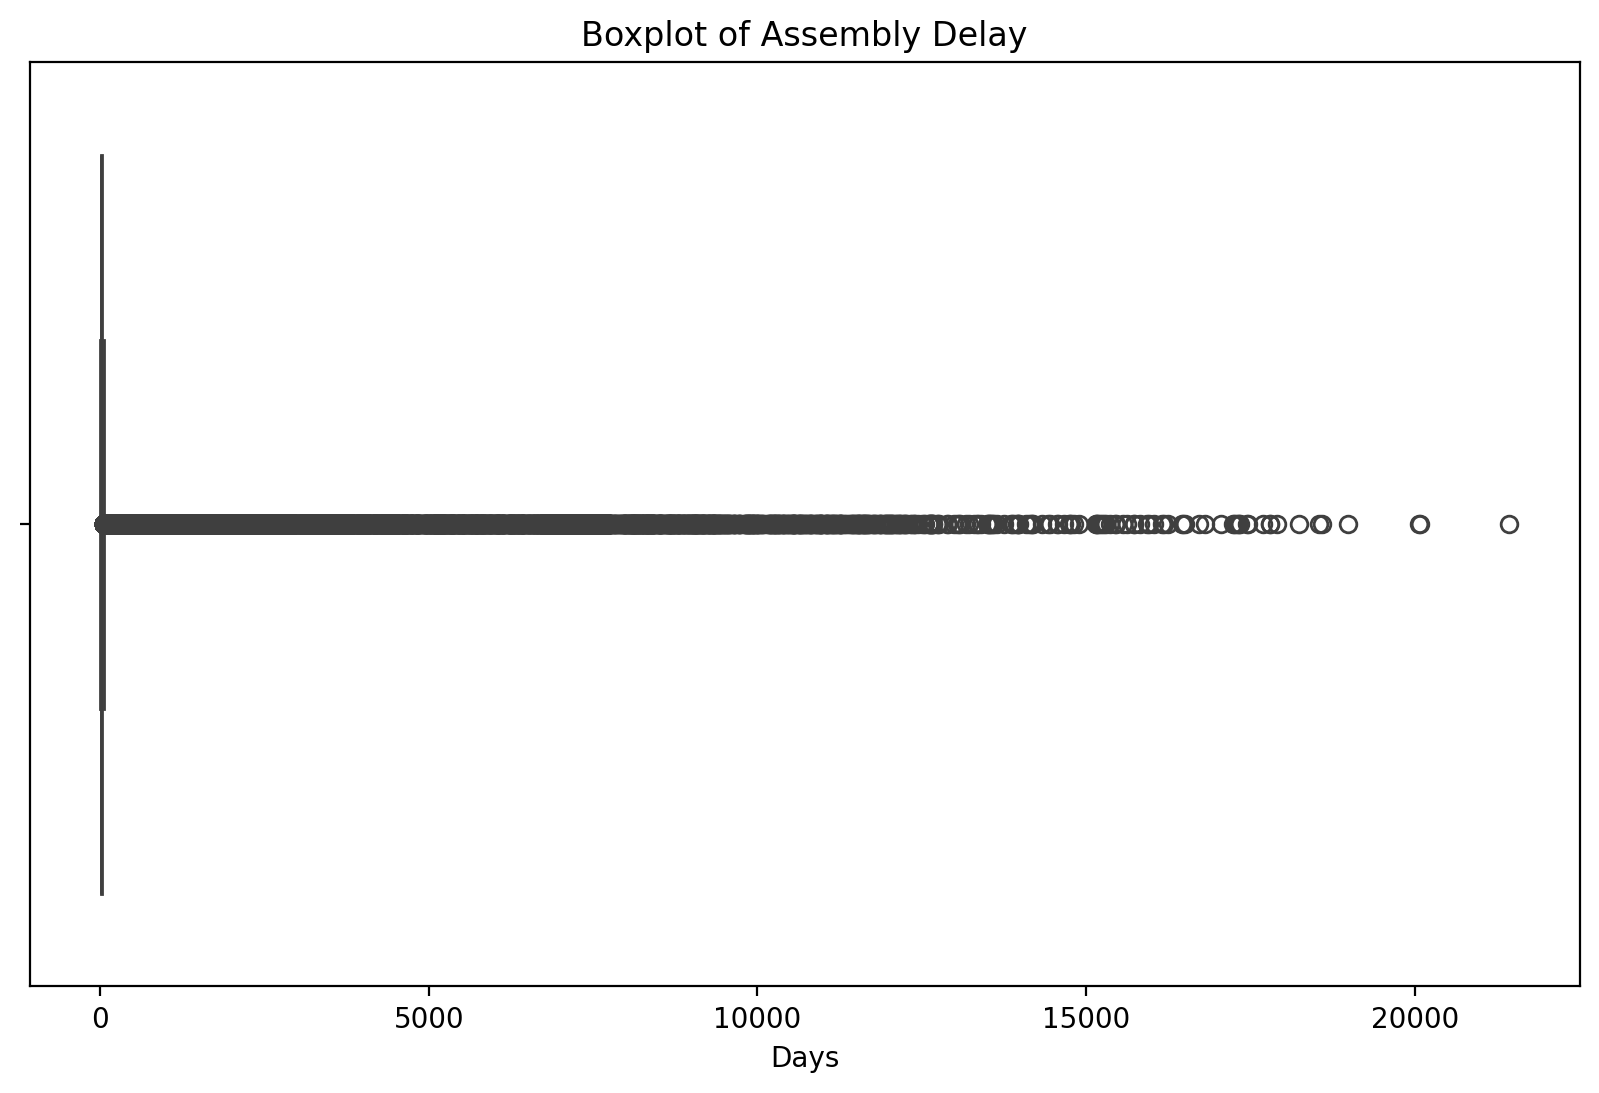

In [63]:
# Create a boxplot for 'assembly_delay'
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['assembly_delay'])
plt.title('Boxplot of Assembly Delay')
plt.xlabel('Days')
plt.show()


In [64]:
q1 = X_train['assembly_delay'].quantile(0.25) # 25th percentile or first quartile
q3 = X_train['assembly_delay'].quantile(0.75)  # 75th percentile or third quartile

print(q1)
print(q3)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print(upper_bound)

# Calculate the upper bound (assuming you already have q3 and an interquartile range iqr)

# Cap the values above the upper bound
X_train['assembly_delay'] = X_train['assembly_delay'].apply(lambda x: min(x, upper_bound))
X_val['assembly_delay'] = X_val['assembly_delay'].apply(lambda x: min(x, upper_bound))
X_test['assembly_delay'] = X_test['assembly_delay'].apply(lambda x: min(x, upper_bound))

X_train['assembly_delay'].max()

5.0
24.0
52.5


52.5

Creation of the new features based on the columns "C-2 Date" and "Assembly Date"
- Number of days between the Accident Date and the C-2 Date: how long it takes to receive the C-2 Report after an accident
- Number of days between the Accident Date and the Assembly Date: the time taken for the claim to be assembled after an accident

### C2_Accident Date:

**The reason we define this in_time category:**

"The C-2F Form was implemented in New York state in 2013 for employers when reporting an employee injury or illness. The form, titled “Employer’s First Report of Work-Related Injury/Illness,” must be filed with the Board within 10 days of the injury or illness. If the employer misses the deadline, he or she will be subject to a financial penalty."

In [65]:
X_train['c2_to_accident_delay'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
X_val['c2_to_accident_delay'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
X_test['c2_to_accident_delay'] = (X_test['C-2 Date'] - X_test['Accident Date']).dt.days

# Function to categorize c2_to_accident_delay using quartiles
def categorize_c2_to_accident_delay(delay):
    if pd.isnull(delay):
        return 'Undetermined'
    elif delay < 0:
        return "C2_First"
    elif 0 <= delay <= 10:
        return 'In_time'
    else:
        return 'Over_time'

# Apply the function to categorize the delay
X_train['c2_to_accident_delay_category'] = X_train['c2_to_accident_delay'].apply(categorize_c2_to_accident_delay)
X_val['c2_to_accident_delay_category'] = X_val['c2_to_accident_delay'].apply(categorize_c2_to_accident_delay)
X_test['c2_to_accident_delay_category'] = X_test['c2_to_accident_delay'].apply(categorize_c2_to_accident_delay)


Likewise, we also did the other feature where we take the absolute value and fill NAs with median (same as assembly delay) <br>
Keep both features to see the best one.

In [66]:
# Calculate the difference between C-2 Date and Accident Date
X_train['c2_to_accident_delay'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days.astype('Int64').abs()
X_val['c2_to_accident_delay'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days.astype('Int64').abs()
X_test['c2_to_accident_delay'] = (X_test['C-2 Date'] - X_test['Accident Date']).dt.days.astype('Int64').abs()

# Replace missing values with the median
median_delay = X_train['c2_to_accident_delay'].median()
X_train['c2_to_accident_delay'] = X_train['c2_to_accident_delay'].fillna(median_delay)
X_val['c2_to_accident_delay'] = X_val['c2_to_accident_delay'].fillna(median_delay)
X_test['c2_to_accident_delay'] = X_test['c2_to_accident_delay'].fillna(median_delay)

X_train['c2_to_accident_delay'].value_counts()

c2_to_accident_delay
2        24862
4        24831
5        24087
3        24060
6        23862
         ...  
11457        1
8384         1
3862         1
1396         1
4162         1
Name: count, Length: 3196, dtype: Int64

In [67]:
q1 = X_train['c2_to_accident_delay'].quantile(0.25) # 25th percentile or first quartile
q3 = X_train['c2_to_accident_delay'].quantile(0.75)  # 75th percentile or third quartile

print(q1)
print(q3)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print(upper_bound)

# Calculate the upper bound (assuming you already have q3 and an interquartile range iqr)

# Cap the values above the upper bound
X_train['c2_to_accident_delay'] = X_train['c2_to_accident_delay'].apply(lambda x: min(x, upper_bound))
X_val['c2_to_accident_delay'] = X_val['c2_to_accident_delay'].apply(lambda x: min(x, upper_bound))
X_test['c2_to_accident_delay'] = X_test['c2_to_accident_delay'].apply(lambda x: min(x, upper_bound))

X_train['c2_to_accident_delay'].max()

5.0
26.0
57.5


57.5

### C3- TO ACCIDENT vs Assembly pos vs neg:??

We are assuming that there is no mistake in C3-Form being first then Accident Date - Cumulative injuries and class 4. and 5. have bigger proportion.

Also categories were defined based on this info:

"You must notify your employer within 30 days, but it is best to do so as soon as possible. If 30 days pass and you have not notified your employer, you may lose your rights to workers' compensation benefits. <br>
As soon as possible, you should also file an Employee Claim (Form C-3) with the Board; this is how you notify the Board of your injury. Form C-3 must be filed within two years of the accident or within two years after you knew (or should have known) that you contracted a disease or condition due to the nature of your employment. If you are filing a claim for an occupational disease, see the reporting requirements for an occupational disease." https://www.wcb.ny.gov/content/main/Workers/file-claim.jsp

In [68]:
# Calculate the difference between C-3 Date and Accident Date
X_train['c3_to_accident_delay'] = (X_train['C-3 Date'] - X_train['Accident Date']).dt.days
X_val['c3_to_accident_delay'] = (X_val['C-3 Date'] - X_val['Accident Date']).dt.days
X_test['c3_to_accident_delay'] = (X_test['C-3 Date'] - X_test['Accident Date']).dt.days

# Handle missing values in C-3 Date using the C3_date_present column
X_train.loc[(X_train['C3_Received'] == 1) & (X_train['Accident_date_present'] == 0), 'c3_to_accident_delay'] = -10000
X_val.loc[(X_val['C3_Received'] == 1) & (X_val['Accident_date_present'] == 0), 'c3_to_accident_delay'] = -10000
X_test.loc[(X_test['C3_Received'] == 1) & (X_test['Accident_date_present'] == 0), 'c3_to_accident_delay'] = -10000

# Handle missing values in Accident Date using the Accident_date_present column
X_train.loc[(X_train['C3_Received'] == 0) & (X_train['Accident_date_present'] == 1), 'c3_to_accident_delay'] = -9999
X_val.loc[(X_val['C3_Received'] == 0) & (X_val['Accident_date_present'] == 1), 'c3_to_accident_delay'] = -9999
X_test.loc[(X_test['C3_Received'] == 0) & (X_test['Accident_date_present'] == 1), 'c3_to_accident_delay'] = -9999

# Function to categorize c3_to_accident_delay using quartiles
def categorize_c3_to_accident_delay(delay):
    if delay == -10000:
        return 'No_accident_date'
    elif delay == -9999:
        return "No_C3"
    elif delay < 0:
        return "C3_first"
    elif 0 <= delay <= 30:
        return 'Short_Delay'
    elif 31 <= delay <= 731:  # 2 years time
        return 'Medium_Delay'
    else:
        return 'Overdue'

# Apply the function to categorize the delay
X_train['c3_to_accident_delay_category'] = X_train['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)
X_val['c3_to_accident_delay_category'] = X_val['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)
X_test['c3_to_accident_delay_category'] = X_test['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)


In this case we decided to drop accident delay due high number of missing values for imputation, just kept the Category:

In [69]:
X_train.drop(columns=["c3_to_accident_delay"], inplace=True)
X_val.drop(columns=["c3_to_accident_delay"], inplace=True) 
X_test.drop(columns=["c3_to_accident_delay"], inplace=True) 

### 9/11 PERIOD:

We also decide to create a feature for accidents happening in 9/11 period since there are programs for people who suffered any type of injury there (working/volunteer) <br>
https://www.wcb.ny.gov/WTC/wtc-assistance-programs.jsp

In [70]:
# Define the date range as datetime64 objects
start_date = np.datetime64('2001-09-11')
end_date = np.datetime64('2002-09-11')

# Create a binary column based on the condition
X_train['9_11_period'] = X_train.apply(lambda row: 1 if start_date <= row['Accident Date'] <= end_date else 0, axis=1)
X_val['9_11_period'] = X_val.apply(lambda row: 1 if start_date <= row['Accident Date'] <= end_date else 0, axis=1)
X_test['9_11_period'] = X_test.apply(lambda row: 1 if start_date <= row['Accident Date'] <= end_date else 0, axis=1)

X_train['9_11_period'].value_counts()

9_11_period
0    401475
1       343
Name: count, dtype: int64

In [71]:
X_train[X_train['9_11_period'] == 1].head(4)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5927744,2001-09-11,47.0,N,2022-02-23,Y,0.0,2022-02-23,2022-02-14,CITY OF TROY,3A. SELF PUBLIC,RENSSELAER,N,ALBANY,M,NaN,92,PUBLIC ADMINISTRATION,II,90,OTHER THAN PHYSICAL CAUSE OF INJURY,1,NO PHYSICAL INJURY,48,INTERNAL ORGANS,12180,0,6,2,0,1,1,1,9,2001,1,11,2022,52.5,Long_Delay,57.5,Over_time,Overdue,1
6149728,2001-09-11,27.0,N,2022-12-09,Y,0.0,2022-12-21,2022-09-19,STATE INSURANCE FUND,2A. SIF,SUFFOLK,N,HAUPPAUGE,M,NaN,<NA>,NaN,IV,<NA>,NaN,<NA>,NaN,15,NOSE,11776,0,4,1,0,1,1,1,9,2001,1,11,2022,52.5,Long_Delay,57.5,Over_time,Overdue,1
5412898,2001-09-11,53.0,N,2020-01-27,Y,0.0,2020-02-05,2020-01-22,CONSOLIDATED EDISON CO OF NY,4A. SELF PRIVATE,NEW YORK,N,STATEWIDE,M,NaN,22,UTILITIES,IV,82,"ABSORPTION, INGESTION OR INHALATION, NOC",65,RESPIRATORY DISORDERS,90,MULTIPLE BODY PARTS (INCLUDING BODY,11757,0,2,2,0,1,1,1,9,2001,1,11,2020,52.5,Long_Delay,57.5,Over_time,Overdue,1
5669604,2001-09-11,37.0,N,2021-03-02,Y,0.0,2021-03-10,2021-02-25,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,WESTCHESTER,N,NYC,M,NaN,48,TRANSPORTATION AND WAREHOUSING,III,6,"DUST, GASES, FUMES OR VAPORS",65,RESPIRATORY DISORDERS,90,MULTIPLE BODY PARTS (INCLUDING BODY,10705,0,0,2,0,1,1,1,9,2001,1,11,2021,52.5,Long_Delay,57.5,Over_time,Overdue,1


In [72]:
# Calculate the difference between C-3 Date and Accident Date
#X_train['c3_to_accident_delay'] = (X_train['C-3 Date'] - X_train['Accident Date']).dt.days
#X_val['c3_to_accident_delay'] = (X_val['C-3 Date'] - X_val['Accident Date']).dt.days
#X_test['c3_to_accident_delay'] = (X_test['C-3 Date'] - X_test['Accident Date']).dt.days


# Handle missing values in C-3 Date using the C3_date_present column and in Accident Date using the Accident_date_present column
#X_train.loc[X_train['C3_Received'] == 0, 'c3_to_accident_delay'] = np.nan
#X_train.loc[X_train['Accident_date_present'] == 0, 'c3_to_accident_delay'] = np.nan

#X_val.loc[X_val['C3_Received'] == 0, 'c3_to_accident_delay'] = np.nan
#X_val.loc[X_val['Accident_date_present'] == 0, 'c3_to_accident_delay'] = np.nan

#X_test.loc[X_test['C3_Received'] == 0, 'c3_to_accident_delay'] = np.nan
#X_test.loc[X_test['Accident_date_present'] == 0, 'c3_to_accident_delay'] = np.nan

# Replace missing values with the median
#median_delay = X_train['c3_to_accident_delay'].median()
#X_train['c3_to_accident_delay'] = X_train['c3_to_accident_delay'].fillna(median_delay)
#X_val['c3_to_accident_delay'] = X_val['c3_to_accident_delay'].fillna(median_delay)
#X_test['c3_to_accident_delay'] = X_test['c3_to_accident_delay'].fillna(median_delay)

# Apply the function to categorize the delay
#X_train['c3_to_accident_delay_category'] = X_train['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)
#X_val['c3_to_accident_delay_category'] = X_val['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)
#X_test['c3_to_accident_delay_category'] = X_test['c3_to_accident_delay'].apply(categorize_c3_to_accident_delay)

The group checked that this new features had negative values.
- Replace the negative days to NaN
- Impute the missing values with the median of the training set

### Drop original date columns:

In [73]:
X_train.drop(columns=['Accident Date', 'Assembly Date', 'C-3 Date', 'C-2 Date'], inplace=True)
X_val.drop(columns=['Accident Date','Assembly Date', 'C-3 Date', 'C-2 Date'], inplace=True)
X_test.drop(columns=['Accident Date','Assembly Date', 'C-3 Date', 'C-2 Date'], inplace=True)

<a class="anchor" id="3rd-bullet">

## Number of Dependents:
    
</a>

In [74]:
X_train['dependents_binary'] = X_train['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)
X_val['dependents_binary'] = X_val['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)
X_test['dependents_binary'] = X_test['Number of Dependents'].apply(lambda x: 1 if x > 0 else 0)

X_train['dependents_binary'].value_counts()

dependents_binary
1    344701
0     57117
Name: count, dtype: int64

keep both columns to see if any of them is good for the model.

In [75]:
X_train['Number of Dependents'].value_counts()

Number of Dependents
6    57851
3    57655
4    57422
5    57377
1    57375
0    57117
2    57021
Name: count, dtype: Int64

<a class="anchor" id="3rd-bullet">

## WCIO variables Groups:
    
</a>

Will keep in model the grouped categories and the initial unique codes:

In [76]:
X_train['general_body_part'] = X_train['WCIO Part Of Body Code'].apply(categorize_body_part_description)
X_train['general_cause_injury'] = X_train['WCIO Cause of Injury Code'].apply(categorize_cause_injury_description)
X_train['general_industry'] = X_train['Industry Code'].apply(categorize_industry_description_final)
X_train['general_nature_injury'] = X_train['WCIO Nature of Injury Code'].apply(categorize_nature_injury_description_final)

X_val['general_body_part'] = X_val['WCIO Part Of Body Code'].apply(categorize_body_part_description)
X_val['general_cause_injury'] = X_val['WCIO Cause of Injury Code'].apply(categorize_cause_injury_description)
X_val['general_industry'] = X_val['Industry Code'].apply(categorize_industry_description_final)
X_val['general_nature_injury'] = X_val['WCIO Nature of Injury Code'].apply(categorize_nature_injury_description_final)

X_test['general_body_part'] = X_test['WCIO Part Of Body Code'].apply(categorize_body_part_description)
X_test['general_cause_injury'] = X_test['WCIO Cause of Injury Code'].apply(categorize_cause_injury_description)
X_test['general_industry'] = X_test['Industry Code'].apply(categorize_industry_description_final)
X_test['general_nature_injury'] = X_test['WCIO Nature of Injury Code'].apply(categorize_nature_injury_description_final)

In [77]:
# Convert to string and fill NAs with "Not_applied" for count encoding

X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].astype('str').replace('<NA>', 'Not_applied')
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_train['Industry Code'] = X_train['Industry Code'].astype('str').replace('<NA>', 'Not_applied')

X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].astype('str').replace('<NA>', 'Not_applied')
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_val['Industry Code'] = X_val['Industry Code'].astype('str').replace('<NA>', 'Not_applied')

X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].astype('str').replace('<NA>', 'Not_applied')
X_test['WCIO Nature of Injury Code'] = X_test['WCIO Nature of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_test['WCIO Cause of Injury Code'] = X_test['WCIO Cause of Injury Code'].astype('str').replace('<NA>', 'Not_applied')
X_test['Industry Code'] = X_test['Industry Code'].astype('str').replace('<NA>', 'Not_applied')

# Check unique values
print(X_train['WCIO Part Of Body Code'].unique())

['55' '65' '38' '32' '90' '60' '56' '10' '39' '35' '31' '53' '15' '-9'
 '18' '61' '33' '43' '34' '58' '11' '25' '91' '54' '99' '36' '44' '42'
 'Not_applied' '14' '46' '13' '37' '51' '52' '66' '30' '40' '12' '41' '57'
 '48' '20' '49' '17' '19' '24' '47' '45' '50' '16' '23' '63' '21' '22'
 '62' '26' '64']


In [78]:
X_train.drop(columns=['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], inplace=True)
X_val.drop(columns=['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], inplace=True)
X_test.drop(columns=['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], inplace=True)

<a class="anchor" id="3rd-bullet">

## Zip Code:
    
</a>

**Based on NYS ZIP Codes and Counties we match those in our dataset to reduce cardinality**

In [79]:
X_train = X_train.reset_index()
X_val = X_val.reset_index()
X_test = X_test.reset_index()

# Merge df_wcio_grouped with zip_match on the Zip Code columns
X_train = X_train.merge(zip_match[['Zip Code Numbers', 'County']], 
                                        left_on='Zip Code', 
                                        right_on='Zip Code Numbers', 
                                        how='left').reset_index()

# Merge df_wcio_grouped with zip_match on the Zip Code columns
X_val = X_val.merge(zip_match[['Zip Code Numbers', 'County']], 
                                        left_on='Zip Code', 
                                        right_on='Zip Code Numbers', 
                                        how='left').reset_index()

# Merge df_wcio_grouped with zip_match on the Zip Code columns
X_test = X_test.merge(zip_match[['Zip Code Numbers', 'County']], 
                                        left_on='Zip Code', 
                                        right_on='Zip Code Numbers', 
                                        how='left').reset_index()

X_train = X_train.set_index('Claim Identifier')
X_val = X_val.set_index('Claim Identifier')
X_test = X_test.set_index('Claim Identifier')

X_train.drop(columns=["index"], inplace=True)
X_val.drop(columns=["index"], inplace=True)
X_test.drop(columns=["index"], inplace=True)

X_train.head(2)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period,dependents_binary,general_body_part,general_cause_injury,general_industry,general_nature_injury,Zip Code Numbers,County
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,23.0,N,N,0.0,STATE INSURANCE FUND,2A. SIF,CAYUGA,N,SYRACUSE,M,NaN,11,I,53,52,55,13143,0,3,1,0,0,1,1,5,2020,1,5,2020,3.0,Short_Delay,3.0,In_time,No_C3,0,1,Lower Extremities,Overexertion and Bodily Reaction,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",Traumatic Injuries and Disorders,13143,Wayne
6023025,35.0,N,Y,1097.0,SIRIUSPOINT AMERICA INSURANCE,1A. PRIVATE,QUEENS,N,NYC,M,4.0,31,IV,31,10,65,11368,1,2,1,1,1,1,1,5,2022,1,10,2022,46.0,Long_Delay,57.5,Over_time,Medium_Delay,0,1,INSUFFICIENT INFO,"Fall, Slip or Trip Injury",Manufacturing,Traumatic Injuries and Disorders,11368,Queens


In [80]:
# Replace missing values in 'County' with 'Unknown', but keep initial NaNs
X_train['Home_county'] = X_train.apply(lambda row: 'Unknown' if pd.isna(row['County']) and not pd.isna(row['Zip Code']) else row['County'], axis=1)
X_val['Home_county'] = X_val.apply(lambda row: 'Unknown' if pd.isna(row['County']) and not pd.isna(row['Zip Code']) else row['County'], axis=1)
X_test['Home_county'] = X_test.apply(lambda row: 'Unknown' if pd.isna(row['County']) and not pd.isna(row['Zip Code']) else row['County'], axis=1)

# Drop not necessary columns.
X_train.drop(columns=['Zip Code','Zip Code Numbers', 'County'], inplace=True)
X_val.drop(columns=['Zip Code','Zip Code Numbers', 'County'], inplace=True)
X_test.drop(columns=['Zip Code','Zip Code Numbers', 'County'], inplace=True)


In [81]:
home_county_mode_to_fill = X_train["Home_county"].mode()[0] # use the information from the training set to fill the missing values for validation set

X_train["Home_county"] = X_train["Home_county"].fillna(home_county_mode_to_fill)
X_val["Home_county"] = X_val["Home_county"].fillna(home_county_mode_to_fill)
X_test["Home_county"] = X_test["Home_county"].fillna(home_county_mode_to_fill)

In [82]:
X_train["Home_county"].nunique()

63

In [83]:
X_train["Home_county"].value_counts()

Home_county
Suffolk      58369
Queens       35482
Unknown      32252
Kings        31359
Nassau       27613
             ...  
Schoharie      493
Lewis          468
Yates          378
Schuyler       357
Hamilton        83
Name: count, Length: 63, dtype: int64

<a class="anchor" id="3rd-bullet">

## County of Injury:
    
</a>

In [84]:
X_train["County of Injury"].unique()

array(['CAYUGA', 'QUEENS', 'MONROE', 'ALBANY', 'KINGS', 'WESTCHESTER',
       'JEFFERSON', 'NEW YORK', 'BROOME', 'NASSAU', 'CHEMUNG', 'BRONX',
       'SUFFOLK', 'DUTCHESS', 'ERIE', 'CLINTON', 'CHAUTAUQUA', 'ORANGE',
       'ONEIDA', 'RICHMOND', 'FULTON', 'MONTGOMERY', 'CATTARAUGUS',
       'ULSTER', 'SARATOGA', 'RENSSELAER', 'ONONDAGA', 'UNKNOWN',
       'ROCKLAND', 'SENECA', 'OSWEGO', 'DELAWARE', 'ST. LAWRENCE',
       'NIAGARA', 'ESSEX', 'WASHINGTON', 'ONTARIO', 'OTSEGO', 'WARREN',
       'ORLEANS', 'PUTNAM', 'ALLEGANY', 'HERKIMER', 'MADISON', 'WYOMING',
       'SCHENECTADY', 'LIVINGSTON', 'LEWIS', 'FRANKLIN', 'HAMILTON',
       'SULLIVAN', 'WAYNE', 'COLUMBIA', 'TOMPKINS', 'STEUBEN', 'CORTLAND',
       'GREENE', 'TIOGA', 'GENESEE', 'SCHUYLER', 'CHENANGO', 'SCHOHARIE',
       'YATES'], dtype=object)

We also define groups for counties based on https://www.ny.gov/counties to see if that would help: <br>
Anyway, we kept both columns (initial andm new)

In [85]:
# Apply the function to create a new column for the region category
X_train['county_zone'] = X_train['County of Injury'].apply(map_county_to_region)
X_val['county_zone'] = X_val['County of Injury'].apply(map_county_to_region)
X_test['county_zone'] = X_test['County of Injury'].apply(map_county_to_region)

X_train['county_zone'].value_counts()

county_zone
New_York_City              136887
Long_Island                 72831
Hudson_Valley               52539
Finger_Lakes                44140
Greater_Niagara             30084
Capital_Saratoga            23804
Central_New_York            16349
Thousand_Islands_Seaway      7217
Adirondacks                  6510
Chautauqua                   6108
Catskills                    4498
Unknown                       851
Name: count, dtype: int64

<a class="anchor" id="3rd-bullet">

## Categorical variables transformations:
    
</a>

- Alternative Dispute Resolution: The group replaced the "U" values with the mode the frequency was very low
- Gender: the group replaced the "X" and "U" with Unknown/Other and then replaced it with the mode
- Attorney/Representative, COVID-19 Indicator, Alternative Dispute Resolution were converted to binary features
- For the test dataset, the group replaced the Special Funds Carrier Types with a single type (5. Special Fund) (This was already done for the training and consequently the validation dataset)



In [86]:
## for the columsn Alternative Dispute Resolution - replace the "U" values with the mode
adr_mode_to_fill = X_train["Alternative Dispute Resolution"].mode()[0]                # use the information from the training set to fill the missing values for validation set
X_train["Alternative Dispute Resolution"] = X_train["Alternative Dispute Resolution"].replace('U', adr_mode_to_fill)
X_val["Alternative Dispute Resolution"] = X_val["Alternative Dispute Resolution"].replace('U', adr_mode_to_fill)
X_test["Alternative Dispute Resolution"] = X_test["Alternative Dispute Resolution"].replace('U', adr_mode_to_fill)

In [87]:
X_train["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    399999
Y      1819
Name: count, dtype: int64

In [88]:
# Replace 'U' with 'Unknown' and 'X' with 'Unknown' in the Gender column
X_train["Gender"] = X_train["Gender"].replace({'U': 'Unknown', 'X': 'Unknown'})
X_val["Gender"] = X_val["Gender"].replace({'U': 'Unknown', 'X': 'Unknown'})
X_test["Gender"] = X_test["Gender"].replace({'U': 'Unknown', 'X': 'Unknown'})

# Replace 'Unknown/Other' with the mode and replace this value in the validation and test set
mode_gender = X_train['Gender'].mode()[0]
X_train["Gender"] = X_train["Gender"].replace('Unknown', mode_gender)
X_val["Gender"] = X_val["Gender"].replace('Unknown', mode_gender)
X_test["Gender"] = X_test["Gender"].replace('Unknown', mode_gender)

#Changing the data type of the columns
X_train["Gender"] = X_train['Gender'].replace({'M': 1, 'F': 0}).astype('Int64')
X_val["Gender"] = X_val['Gender'].replace({'M': 1, 'F': 0}).astype('Int64')
X_test["Gender"] = X_test['Gender'].replace({'M': 1, 'F': 0}).astype('Int64')

In [89]:
X_train["Gender"].value_counts()

Gender
1    238115
0    163703
Name: count, dtype: Int64

In [90]:
#Changing the data type of the columns : "Attorney/Representative", "COVID-19 Indicator", "Alternative Dispute Resolution" to binary
columns_to_binary=["Attorney/Representative", "COVID-19 Indicator", "Alternative Dispute Resolution"]
for i in columns_to_binary:
    X_train[i] = X_train[i].map({'Y': 1, 'N': 0}).astype('Int64')
    X_val[i] = X_val[i].map({'Y': 1, 'N': 0}).astype('Int64')
    X_test[i] = X_test[i].map({'Y': 1, 'N': 0}).astype('Int64')

In [91]:
# Define the special fund carrier types
special_fund_types = [
    "5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)",
    "5C. SPECIAL FUND - POI CARRIER WCB MENANDS",
    "5D. SPECIAL FUND - UNKNOWN"
]

# Replace the special fund carrier types with a single type
X_train["Carrier Type"] = X_train["Carrier Type"].replace(special_fund_types, "5. SPECIAL FUND")
X_val["Carrier Type"] = X_val["Carrier Type"].replace(special_fund_types, "5. SPECIAL FUND")
X_test["Carrier Type"] = X_test["Carrier Type"].replace(special_fund_types, "5. SPECIAL FUND")

<a class="anchor" id="3rd-bullet">

## Encoding categorical variables:
    
</a>

<a class="anchor" id="3rd-bullet">

### Carrier Name:
    
</a>

Tried to see how model would behave having only top 20 counties and Unknown, the rest would be all "Other" to reduce high cardinality <br>
However, we kept both columns

In [92]:
# Identify the top 20 carriers
top_20_carriers = X_train['Carrier Name'].value_counts().index[:20]

# Define a function to categorize based on these statistics
def categorize_carrier_name(x):
    if x == "*** CARRIER UNDETERMINED ***":
        return 'UNKNOWN'
    elif x in top_20_carriers:
        return x
    else:
        return 'Other'

X_train['Carrier_Name_Category'] = X_train['Carrier Name'].apply(categorize_carrier_name)
X_val['Carrier_Name_Category'] = X_val['Carrier Name'].apply(categorize_carrier_name)
X_test['Carrier_Name_Category'] = X_test['Carrier Name'].apply(categorize_carrier_name)

X_train['Carrier_Name_Category'].value_counts()

Carrier_Name_Category
Other                            187919
STATE INSURANCE FUND              77555
POLICE, FIRE, SANITATION          15097
AMERICAN ZURICH INSURANCE CO      12200
CHARTER OAK FIRE INS CO           12037
INDEMNITY INS. OF N AMERICA       10108
SAFETY NATIONAL CASUALTY CORP      9783
NEW HAMPSHIRE INSURANCE CO         8967
LM INSURANCE CORP                  8571
A I U INSURANCE COMPANY            7772
INDEMNITY INSURANCE CO OF          6374
NYC TRANSIT AUTHORITY              5834
HARTFORD ACCIDENT & INDEMNITY      5312
NEW YORK BLACK CAR OPERATORS'      5081
ARCH INDEMNITY INSURANCE CO.       4657
AIU INSURANCE CO                   4519
CNY OTHER THAN ED, HED WATER       4507
HEALTH & HOSPITAL CORP.            3920
ARCH INDEMNITY INSURANCE CO        3732
PENNSYLVANIA MANUFACTURERS'        3401
PUBLIC EMPLOYERS RISK MGMT.        3234
UNKNOWN                            1238
Name: count, dtype: int64

<a class="anchor" id="3rd-bullet">

### Carrier Type:
    
</a>

In [93]:
X_train['Carrier Type'].unique()

array(['2A. SIF', '1A. PRIVATE', '3A. SELF PUBLIC', '4A. SELF PRIVATE',
       '5. SPECIAL FUND', 'UNKNOWN'], dtype=object)

We created a feature for having or not carrier active, assuming "Unknown" would mean not having insurance.

In [94]:
X_train['Carrier_binary'] = X_train['Carrier Type'].apply(lambda x: 1 if x == 'UNKNOWN' else 0)
X_val['Carrier_binary'] = X_val['Carrier Type'].apply(lambda x: 1 if x == 'UNKNOWN' else 0)
X_test['Carrier_binary'] = X_test['Carrier Type'].apply(lambda x: 1 if x == 'UNKNOWN' else 0)

X_train['Carrier_binary'].value_counts()

Carrier_binary
0    400580
1      1238
Name: count, dtype: int64

<a class="anchor" id="3rd-bullet">

### Ime-4 Count or binary:
    
</a>

Due to high number of missing values, we convert this feature into binary:

In [95]:
X_train['IME4_binary'] = X_train['IME-4 Count'].apply(lambda x: 1 if x > 0 else 0)
X_val['IME4_binary'] = X_val['IME-4 Count'].apply(lambda x: 1 if x > 0 else 0)
X_test['IME4_binary'] = X_test['IME-4 Count'].apply(lambda x: 1 if x > 0 else 0)

X_train['IME4_binary'].value_counts()

IME4_binary
0    308855
1     92963
Name: count, dtype: int64

For the original feature, we fill NAs with zero, and controlled outliers after noticing on EDA there is not really a difference in having 10 or 50 IME´s...

In [96]:
# Replace NaN with 0 in the specified column for all datasets
print(X_train['IME-4 Count'].isnull().sum())

X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
X_test['IME-4 Count'] = X_test['IME-4 Count'].fillna(0)

print(X_train['IME-4 Count'].isnull().sum())

308855
0


In [97]:
# Calculate Q1 and Q3 for 'IME-4 Count' where values are greater than 0
q1 = X_train[X_train['IME-4 Count'] > 0]['IME-4 Count'].quantile(0.25)
q3 = X_train[X_train['IME-4 Count'] > 0]['IME-4 Count'].quantile(0.75)

print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)

# Calculate IQR and upper bound
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print("Upper bound:", upper_bound)

# Cap values above the upper bound in 'IME-4 Count'
X_train['IME-4 Count'] = X_train['IME-4 Count'].apply(lambda x: min(x, upper_bound))
X_val['IME-4 Count'] = X_val['IME-4 Count'].apply(lambda x: min(x, upper_bound))
X_test['IME-4 Count'] = X_test['IME-4 Count'].apply(lambda x: min(x, upper_bound))

# Verify maximum value in capped 'IME-4 Count' in training set
print("Max value in 'IME-4 Count' after capping:", X_train['IME-4 Count'].max())


Q1 (25th percentile): 1.0
Q3 (75th percentile): 4.0
Upper bound: 8.5
Max value in 'IME-4 Count' after capping: 8.5


In [98]:
# using function previous define in EDA "IME-4 Count" to categorize based on these statistics
# Apply the function to create a new feature

#X_train['IME4_Category'] = X_train['IME-4 Count'].apply(categorize_ime4_count)
#X_val['IME4_Category'] = X_val['IME-4 Count'].apply(categorize_ime4_count)
#X_test['IME4_Category'] = X_test['IME-4 Count'].apply(categorize_ime4_count)

# Drop the original 'IME-4 Count' feature

#X_train.drop(columns=["IME-4 Count"], inplace=True)
#X_val.drop(columns=["IME-4 Count"], inplace=True)
#X_test.drop(columns=["IME-4 Count"], inplace=True)

# Check the distribution of the new feature
#print(X_train['IME4_Category'].value_counts())
#print(X_train['IME4_Category'].isnull().sum())
#print(X_val['IME4_Category'].isnull().sum())
#print(X_test['IME4_Category'].isnull().sum())

<a class="anchor" id="3rd-bullet">

### AWW MAP:
    
</a>

Two variables: one categorical without replacement of missing values and other with fillna by Industry median () and where we control outliers.

We could define this as quartiles, however difference between q1, q2 and q3 was to small...

In [99]:
# Calculate the quartiles excluding claims with 0 wage
claims_with_nonzero_wage = X_train[X_train['Average Weekly Wage'] > 0]

q1 = claims_with_nonzero_wage['Average Weekly Wage'].quantile(0.25)  # 25th percentile or first quartile
q2 = claims_with_nonzero_wage['Average Weekly Wage'].quantile(0.50)  # 50th percentile or median
q3 = claims_with_nonzero_wage['Average Weekly Wage'].quantile(0.75)  # 75th percentile or third quartile


# Function to categorize the wage using quartiles
def categorize_wage_quartiles(wage):
    if pd.isnull(wage):
        return 'Missing_Wage'
    elif wage == 0:
        return 'No_Wage'
    elif 0 < wage <= 1000:
        return 'low_wage'
    elif 1000 < wage <= 3000:
        return 'medium_high_wage'
    else:
        return 'huge_wage'

# Apply the function to categorize the wage in the training, validation, and test sets
X_train['average_weekly_wage_category'] = X_train['Average Weekly Wage'].apply(categorize_wage_quartiles)
X_val['average_weekly_wage_category'] = X_val['Average Weekly Wage'].apply(categorize_wage_quartiles)
X_test['average_weekly_wage_category'] = X_test['Average Weekly Wage'].apply(categorize_wage_quartiles)

X_train['average_weekly_wage_category'].value_counts()

average_weekly_wage_category
No_Wage             234703
medium_high_wage     75900
low_wage             67560
Missing_Wage         20066
huge_wage             3589
Name: count, dtype: int64

we looked for the median value by Industry to reduce noise but to try get accurate values

In [100]:
# Calculate the median wage for each industry code in the training set
median_wage_by_industry = X_train.groupby("Industry Code")["Average Weekly Wage"].median()

# Fill missing values in the training set with the corresponding industry median
X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].fillna(
    X_train["Industry Code"].map(median_wage_by_industry)
)

# Fill missing values in the validation and test sets with the corresponding industry median
X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].fillna(
    X_val["Industry Code"].map(median_wage_by_industry)
)
X_test["Average Weekly Wage"] = X_test["Average Weekly Wage"].fillna(
    X_test["Industry Code"].map(median_wage_by_industry)
)

# Check for remaining NaNs
print("Remaining NaNs in training set:", X_train["Average Weekly Wage"].isna().sum())
print("Remaining NaNs in validation set:", X_val["Average Weekly Wage"].isna().sum())
print("Remaining NaNs in test set:", X_test["Average Weekly Wage"].isna().sum())


Remaining NaNs in training set: 0
Remaining NaNs in validation set: 0
Remaining NaNs in test set: 0


In [101]:
# Calculate Q1 and Q3 for 'IME-4 Count' where values are greater than 0
q1 = X_train[X_train['Average Weekly Wage'] > 0]['Average Weekly Wage'].quantile(0.25)
q3 = X_train[X_train['Average Weekly Wage'] > 0]['Average Weekly Wage'].quantile(0.75)

print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)

# Calculate IQR and upper bound
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print("Upper bound:", upper_bound)

# Cap values above the upper bound in 'Average Weekly Wage'
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].apply(lambda x: min(x, upper_bound))
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].apply(lambda x: min(x, upper_bound))
X_test['Average Weekly Wage'] = X_test['Average Weekly Wage'].apply(lambda x: min(x, upper_bound))

# Verify maximum value in capped 'IME-4 Count' in training set
print("Max value in 'Average Weekly Wage' after capping:", X_train['Average Weekly Wage'].max())

Q1 (25th percentile): 685.95
Q3 (75th percentile): 1568.0275
Upper bound: 2891.1437499999997
Max value in 'Average Weekly Wage' after capping: 2891.1437499999997


In [102]:
print("Max value in 'Average Weekly Wage' after capping:", X_train['Average Weekly Wage'].max())

Max value in 'Average Weekly Wage' after capping: 2891.1437499999997


In [103]:
#X_train['average_weekly_wage_category'].value_counts()

For this variable, the group decided to:
- Impute the missing values with the median of the training set
- Group the average weekly wage in low compensation, medium compensation, high compensation and very high compensation based on quartiles and bounds excluding claims with 0 wage. This categorization was based on the following:
    - Value = 0: 
    - Low Wage
    - Medium Wage
    - : High Wage
    - < Value: Very High Wage

The variable 'Average Weekly Wage Category' have an Inherent Order. This means that the categories can be ordered from lowest to highest. The group used ordinal encoding because the categories have a natural ordering.

<a class="anchor" id="3rd-bullet">

### Frequency Encoder:
    
</a>

In [104]:
X_train.head(1)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period,dependents_binary,general_body_part,general_cause_injury,general_industry,general_nature_injury,Home_county,county_zone,Carrier_Name_Category,Carrier_binary,IME4_binary,average_weekly_wage_category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,23.0,0,0,0.0,STATE INSURANCE FUND,2A. SIF,CAYUGA,0,SYRACUSE,1,0.0,11,I,53,52,55,0,3,1,0,0,1,1,5,2020,1,5,2020,3.0,Short_Delay,3.0,In_time,No_C3,0,1,Lower Extremities,Overexertion and Bodily Reaction,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",Traumatic Injuries and Disorders,Wayne,Finger_Lakes,STATE INSURANCE FUND,0,0,No_Wage


We decided to use count encoder as it maintain same number of features and replace label by the frequency of that labeL. <br>
We also defined min group size, to not look into labels that only appear for instance one time... 

In [105]:
columns_to_encode = ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
                     'WCIO Part Of Body Code', 'assembly_delay_category', 'c2_to_accident_delay_category', 'c3_to_accident_delay_category' ,'Home_county', 'county_zone',
                     'general_body_part', 'general_cause_injury', 'general_industry', 'general_nature_injury', 'average_weekly_wage_category', 'Carrier_Name_Category'] 

# Create the count encoder
count_encoder = ce.CountEncoder(cols= columns_to_encode, handle_unknown='value', min_group_size=50)
count_encoder.fit(X_train, y_train)

# Transform the training and validation sets
X_train = count_encoder.transform(X_train)
X_val = count_encoder.transform(X_val)
X_test = count_encoder.transform(X_test)

In [106]:
X_train.head(3)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period,dependents_binary,general_body_part,general_cause_injury,general_industry,general_nature_injury,Home_county,county_zone,Carrier_Name_Category,Carrier_binary,IME4_binary,average_weekly_wage_category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,23.0,0,0,0.00,77555,77555,3213,0,31275,1,0.0,1674,94851,8335,107391,17460,0,3,1,0,0,1,1,5,2020,1,5,2020,3.0,112151,3.0,203332,270928,0,1,79771,108485,1674,333679,2113,44140,77555,0,0,234703
6023025,35.0,0,1,1097.00,290,199914,40788,0,189992,1,4.0,7088,186375,22242,77440,3733,1,2,1,1,1,1,1,5,2022,1,10,2022,46.0,96956,57.5,186065,56756,0,1,3733,83895,26869,333679,35482,136887,187919,0,1,75900
5851908,41.0,0,1,623.35,10108,199914,16740,0,28149,0,2.0,12192,94851,32701,107391,26426,0,3,2,1,1,1,1,5,2021,2,19,2021,52.5,96956,57.5,186065,56756,0,1,124656,108485,26869,333679,15162,44140,10108,0,1,67560


<a class="anchor" id="3rd-bullet">

## Data Scaling:
    
</a>

In [107]:
X_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period,dependents_binary,general_body_part,general_cause_injury,general_industry,general_nature_injury,Home_county,county_zone,Carrier_Name_Category,Carrier_binary,IME4_binary,average_weekly_wage_category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,23.0,0,0,0.00,77555,77555,3213,0,31275,1,0.0,1674,94851,8335,107391,17460,0,3,1,0,0,1,1,5,2020,1,5,2020,3.0,112151,3.0,203332,270928,0,1,79771,108485,1674,333679,2113,44140,77555,0,0,234703
6023025,35.0,0,1,1097.00,290,199914,40788,0,189992,1,4.0,7088,186375,22242,77440,3733,1,2,1,1,1,1,1,5,2022,1,10,2022,46.0,96956,57.5,186065,56756,0,1,3733,83895,26869,333679,35482,136887,187919,0,1,75900
5851908,41.0,0,1,623.35,10108,199914,16740,0,28149,0,2.0,12192,94851,32701,107391,26426,0,3,2,1,1,1,1,5,2021,2,19,2021,52.5,96956,57.5,186065,56756,0,1,124656,108485,26869,333679,15162,44140,10108,0,1,67560
5913931,58.0,0,1,1042.13,10108,199914,9604,0,60165,1,2.0,7088,94851,8447,38955,6925,0,1,3,1,0,1,1,2,2022,3,3,2022,1.0,112151,1.0,203332,270928,0,1,124656,83895,26869,333679,4389,23804,10108,0,1,75900
5845976,58.0,0,0,0.00,2083,199914,37379,0,189992,0,0.0,79880,186375,20446,8940,15882,0,5,3,0,0,1,1,9,2021,1,21,2021,38.0,96956,38.0,186065,270928,0,1,46090,83895,79880,9202,31359,136887,187919,0,0,20066


Using a Standard Scaler can help manage outliers in our dataset by standardizing the features to have a mean of 0 and a standard deviation of 1. <br>
Also the model will perform better after scaling the data.

In [108]:
from sklearn.preprocessing import StandardScaler

# Define the features to scale
features_to_scale = ['Age at Injury', 'Average Weekly Wage', 'Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'IME-4 Count' ,'Industry Code', 'Medical Fee Region',
                     'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents', 'Age_Category', 'Accident_Day' ,'Accident_DOW',
                     'Accident_Month', 'Accident_Year', 'Assembly_year', 'assembly_delay', 'assembly_delay_category', 'c2_to_accident_delay', 'c2_to_accident_delay_category', 'c3_to_accident_delay_category',
                     'Home_county', 'county_zone', 'general_body_part', 'general_cause_injury', 'general_industry', 'general_nature_injury', 'average_weekly_wage_category',
                     'Carrier_Name_Category']

# Initialize the scaler
standard_scaler = StandardScaler()

# Fit only on the training set
X_train[features_to_scale] = standard_scaler.fit_transform(X_train[features_to_scale])

# Apply the same transformation on validation and test sets
X_val[features_to_scale] = standard_scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = standard_scaler.transform(X_test[features_to_scale])

# Assign the scaled data back to the original variables
X_train_scaled = X_train
X_val_scaled = X_val
X_test_scaled = X_test


In [109]:
X_train_scaled.head(4)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Age_Category,Hearing_Held,C3_Received,C2_Received,Accident_date_present,Accident_Month,Accident_Year,Accident_DOW,Accident_Day,Assembly_year,assembly_delay,assembly_delay_category,c2_to_accident_delay,c2_to_accident_delay_category,c3_to_accident_delay_category,9_11_period,dependents_binary,general_body_part,general_cause_injury,general_industry,general_nature_injury,Home_county,county_zone,Carrier_Name_Category,Carrier_binary,IME4_binary,average_weekly_wage_category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,-1.428206,0,0,-0.630267,2.017024,-0.899357,-1.288483,0,-1.050536,1,-0.420780,-1.295883,-0.442801,-0.619085,1.330854,-0.028552,0,-0.003243,-1.154843,0,0,1,1,-0.425829,-0.446623,-0.823966,-1.179756,-1.298838,-0.847250,-0.713755,-0.813968,0.422852,0.692991,0,1,0.030662,0.635800,-2.262533,0.45182,-1.212547,-0.681895,-0.349724,0,0,0.834535
6023025,-0.549433,0,1,0.941613,-0.649227,0.983051,1.278211,0,1.045224,1,1.979838,-1.101421,1.021148,0.884975,0.576614,-1.233835,1,-0.503107,-1.154843,1,1,1,1,-0.425829,0.631008,-0.823966,-0.613738,1.169726,1.664676,-1.057403,2.019300,-0.100966,-1.478224,0,1,-2.021291,0.013373,-1.418339,0.45182,0.630997,1.287066,1.017535,0,1,-1.035143
5851908,-0.110046,0,1,0.262925,-0.310429,0.983051,-0.364473,0,-1.091813,0,0.779529,-0.918094,-0.442801,2.016130,1.330854,0.758697,0,-0.003243,0.268884,1,1,1,1,-0.425829,0.092193,-0.271852,0.405095,-0.064556,2.044386,-1.057403,2.019300,-0.100966,-1.478224,0,1,1.241924,0.635800,-1.418339,0.45182,-0.491626,-0.681895,-1.185300,0,1,-1.133334
5913931,1.134883,0,1,0.862990,-0.310429,0.983051,-0.851923,0,-0.669061,1,0.779529,-1.101421,-0.442801,-0.606973,-0.392532,-0.953565,0,-1.002971,1.692611,1,0,1,1,-1.291353,0.631008,0.280262,-1.406164,1.169726,-0.964084,-0.713755,-0.917941,0.422852,0.692991,0,1,1.241924,0.013373,-1.418339,0.45182,-1.086804,-1.113616,-1.185300,0,1,-1.035143


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 6. Feature Selection
    

    
</div>

<a class="anchor" id="3rd-bullet">

## Filter methods:
    
</a>

### Variance

This feature can still be important, let´s see:

In [110]:
variances = X_train_scaled.var().sort_values(ascending=True)
low_variance_features = variances[variances < 0.001]
low_variance_features

9_11_period    0.000853
dtype: Float64

In [111]:
low_variance_features = low_variance_features.index.to_list()
low_variance_features

['9_11_period']

### Correlation indices

In [112]:
# Calculate the Spearman correlation matrix
cor_spearman = X_train_scaled.corr(method='spearman')

# List to store correlated feature pairs
correlated_features = []

# Check for pairs of variables with a correlation higher than 0.8
for i in range(len(cor_spearman.columns)):
    for j in range(i):
        if abs(cor_spearman.iloc[i, j]) > 0.80:
            correlated_features.append((cor_spearman.columns[i], cor_spearman.columns[j], cor_spearman.iloc[i, j]))

# Print the correlated feature pairs
for feature_pair in correlated_features:
    print(f"Features: {feature_pair[0]} and {feature_pair[1]}, Correlation: {feature_pair[2]:.2f}")


Features: Age_Category and Age at Injury, Correlation: 0.92
Features: Assembly_year and Accident_Year, Correlation: 0.93
Features: c2_to_accident_delay and assembly_delay, Correlation: 0.95
Features: c2_to_accident_delay_category and assembly_delay, Correlation: -0.83
Features: c2_to_accident_delay_category and c2_to_accident_delay, Correlation: -0.83
Features: c3_to_accident_delay_category and C3_Received, Correlation: -0.98
Features: Home_county and County of Injury, Correlation: 0.83
Features: IME4_binary and IME-4 Count, Correlation: 0.99


In [113]:
# Calculate the Spearman correlation matrix
cor_spearman = X_train_scaled.corr(method='spearman')

# Set to store unique feature names
correlated_features_set = set()

# Check for pairs of variables with a correlation higher than 0.8
for i in range(len(cor_spearman.columns)):
    for j in range(i):
        if abs(cor_spearman.iloc[i, j]) > 0.80:
            correlated_features_set.add(cor_spearman.columns[i])
            correlated_features_set.add(cor_spearman.columns[j])

# Convert the set to a list
correlated_features_list = list(correlated_features_set)

# Print the list of correlated feature names
print("Features that appeared at least once in correlated pairs:")
print(correlated_features_list)


Features that appeared at least once in correlated pairs:
['c2_to_accident_delay', 'c3_to_accident_delay_category', 'C3_Received', 'IME4_binary', 'County of Injury', 'Age at Injury', 'c2_to_accident_delay_category', 'Home_county', 'assembly_delay', 'Age_Category', 'Accident_Year', 'Assembly_year', 'IME-4 Count']


<a class="anchor" id="3rd-bullet">

## Feature Importances:
    
</a>

### Feature Importance - RidgeCV

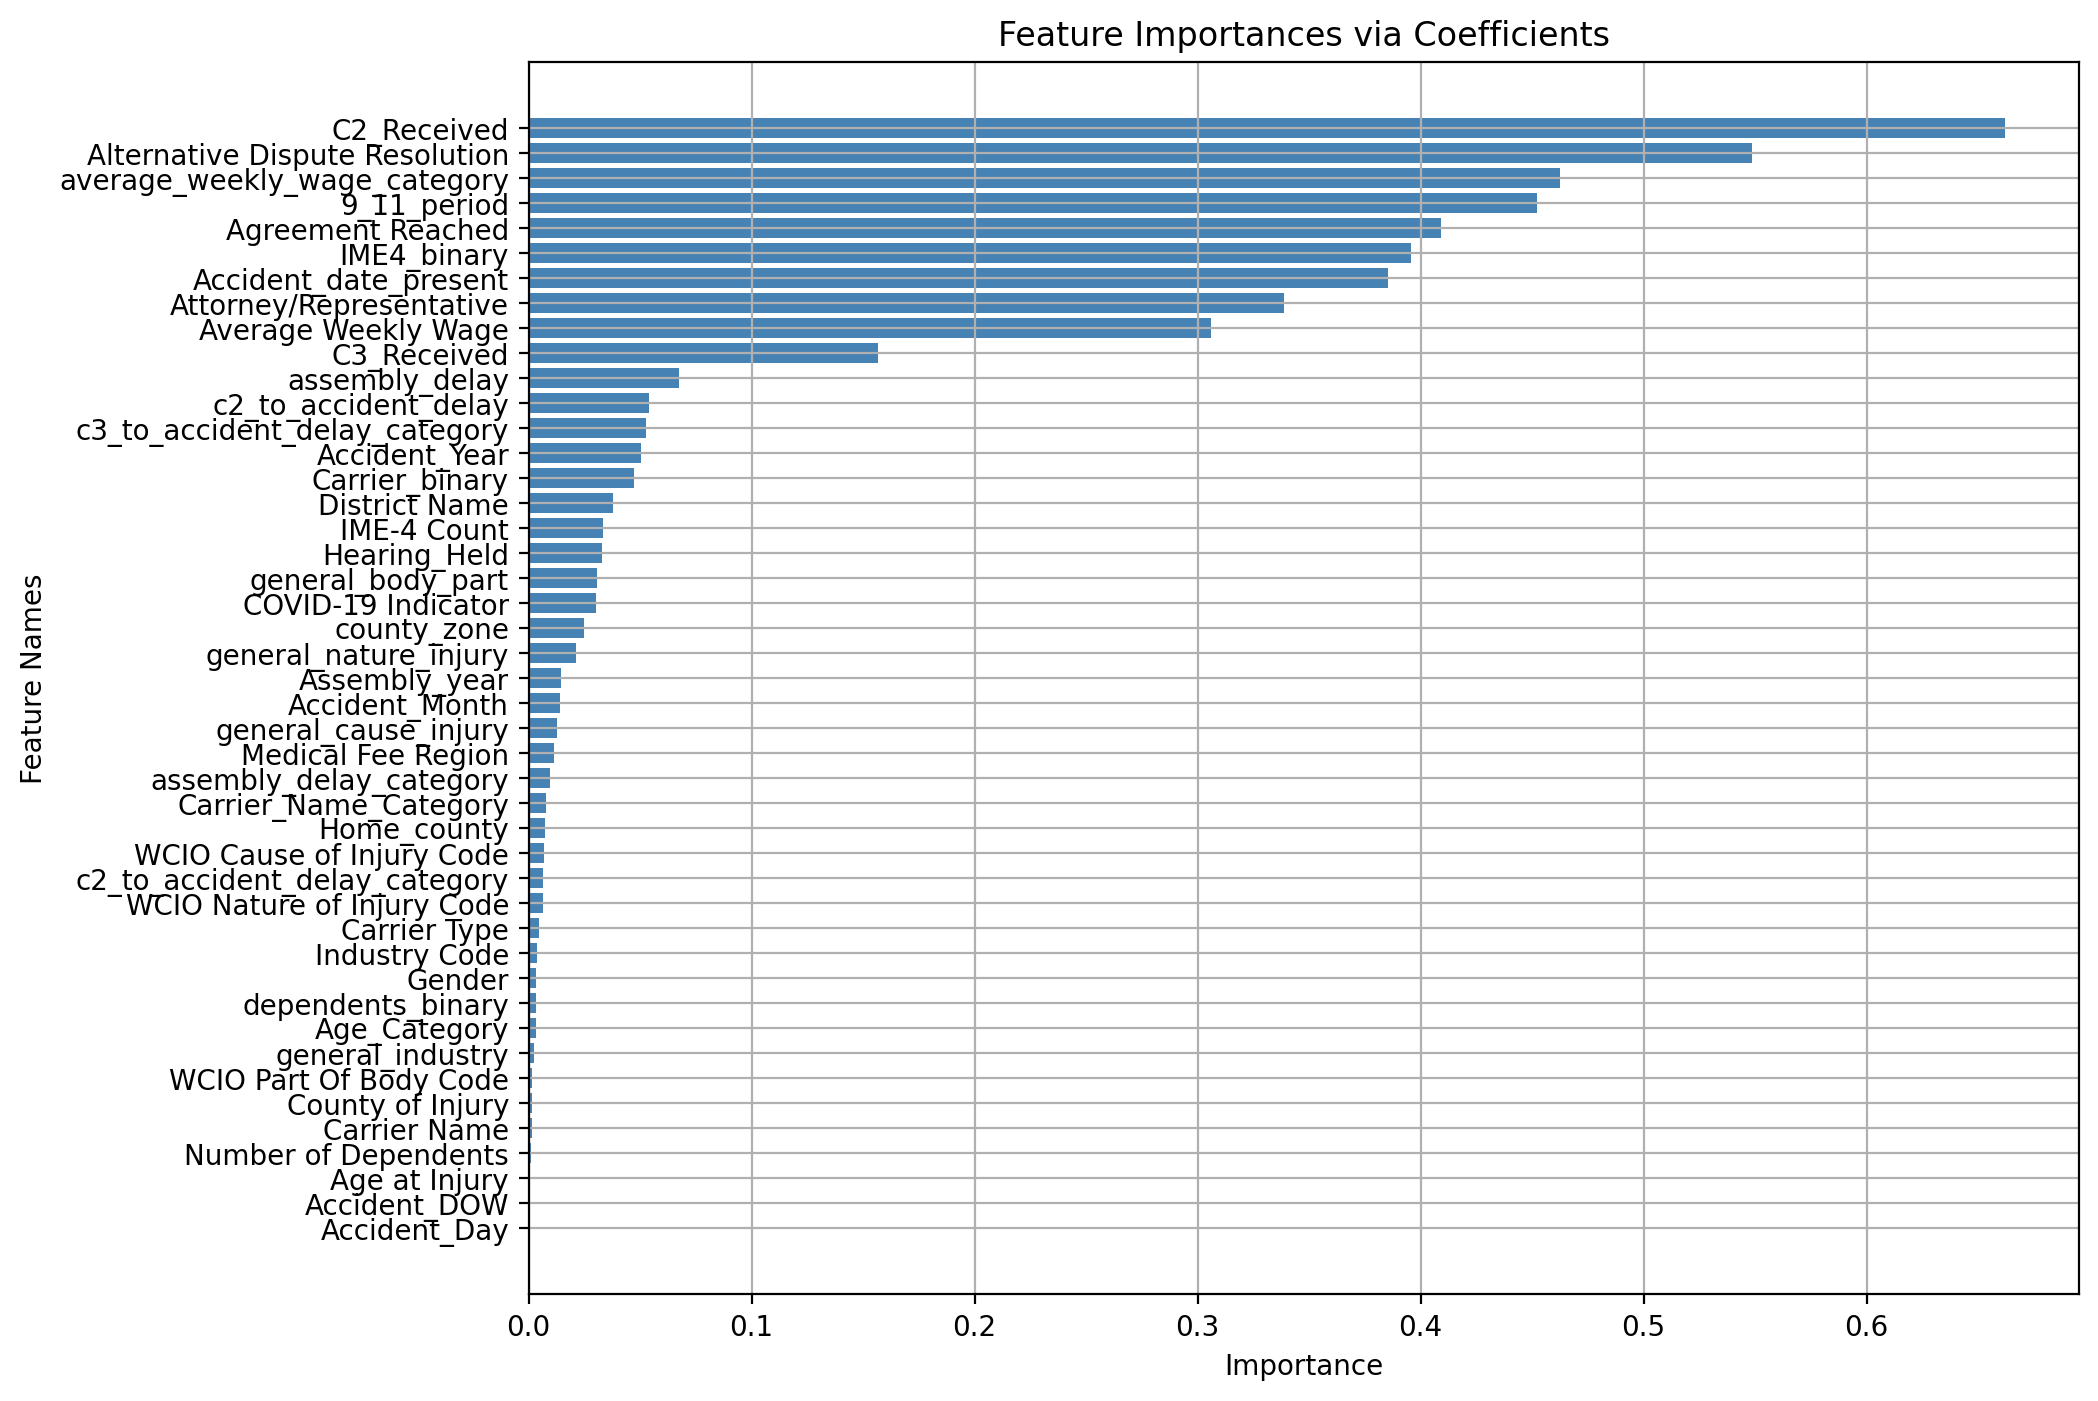

In [114]:
from sklearn.linear_model import RidgeCV

# Define the alphas for RidgeCV
alphas = np.logspace(-6, 6, num=5)

# Fit the RidgeCV model
ridge = RidgeCV(alphas=alphas).fit(X_train_scaled, y_train)

# Get the importance of features
importance = np.abs(ridge.coef_).flatten()

# Ensure feature names are correctly defined
feature_names = np.array(X_train_scaled.columns)

# Create a DataFrame to sort the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the sorted feature importances with labels on the side
plt.figure(figsize=(10, 8))
plt.barh(y=importance_df['Feature'], width=importance_df['Importance'], color='#4782B4')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances via Coefficients')
plt.grid(True)
plt.show()


In [115]:
low_importance_features_ridge = importance_df[importance_df['Importance'] < 0.005]['Feature'].tolist()
# Print the list of low importance features 
print("Features with importance below 0.005:") 
print(low_importance_features_ridge)

Features with importance below 0.005:
['Accident_Day', 'Accident_DOW', 'Age at Injury', 'Number of Dependents', 'Carrier Name', 'County of Injury', 'WCIO Part Of Body Code', 'general_industry', 'Age_Category', 'dependents_binary', 'Gender', 'Industry Code', 'Carrier Type']


### Mutual Info Gain:

<Axes: title={'center': 'Mutual Information'}>

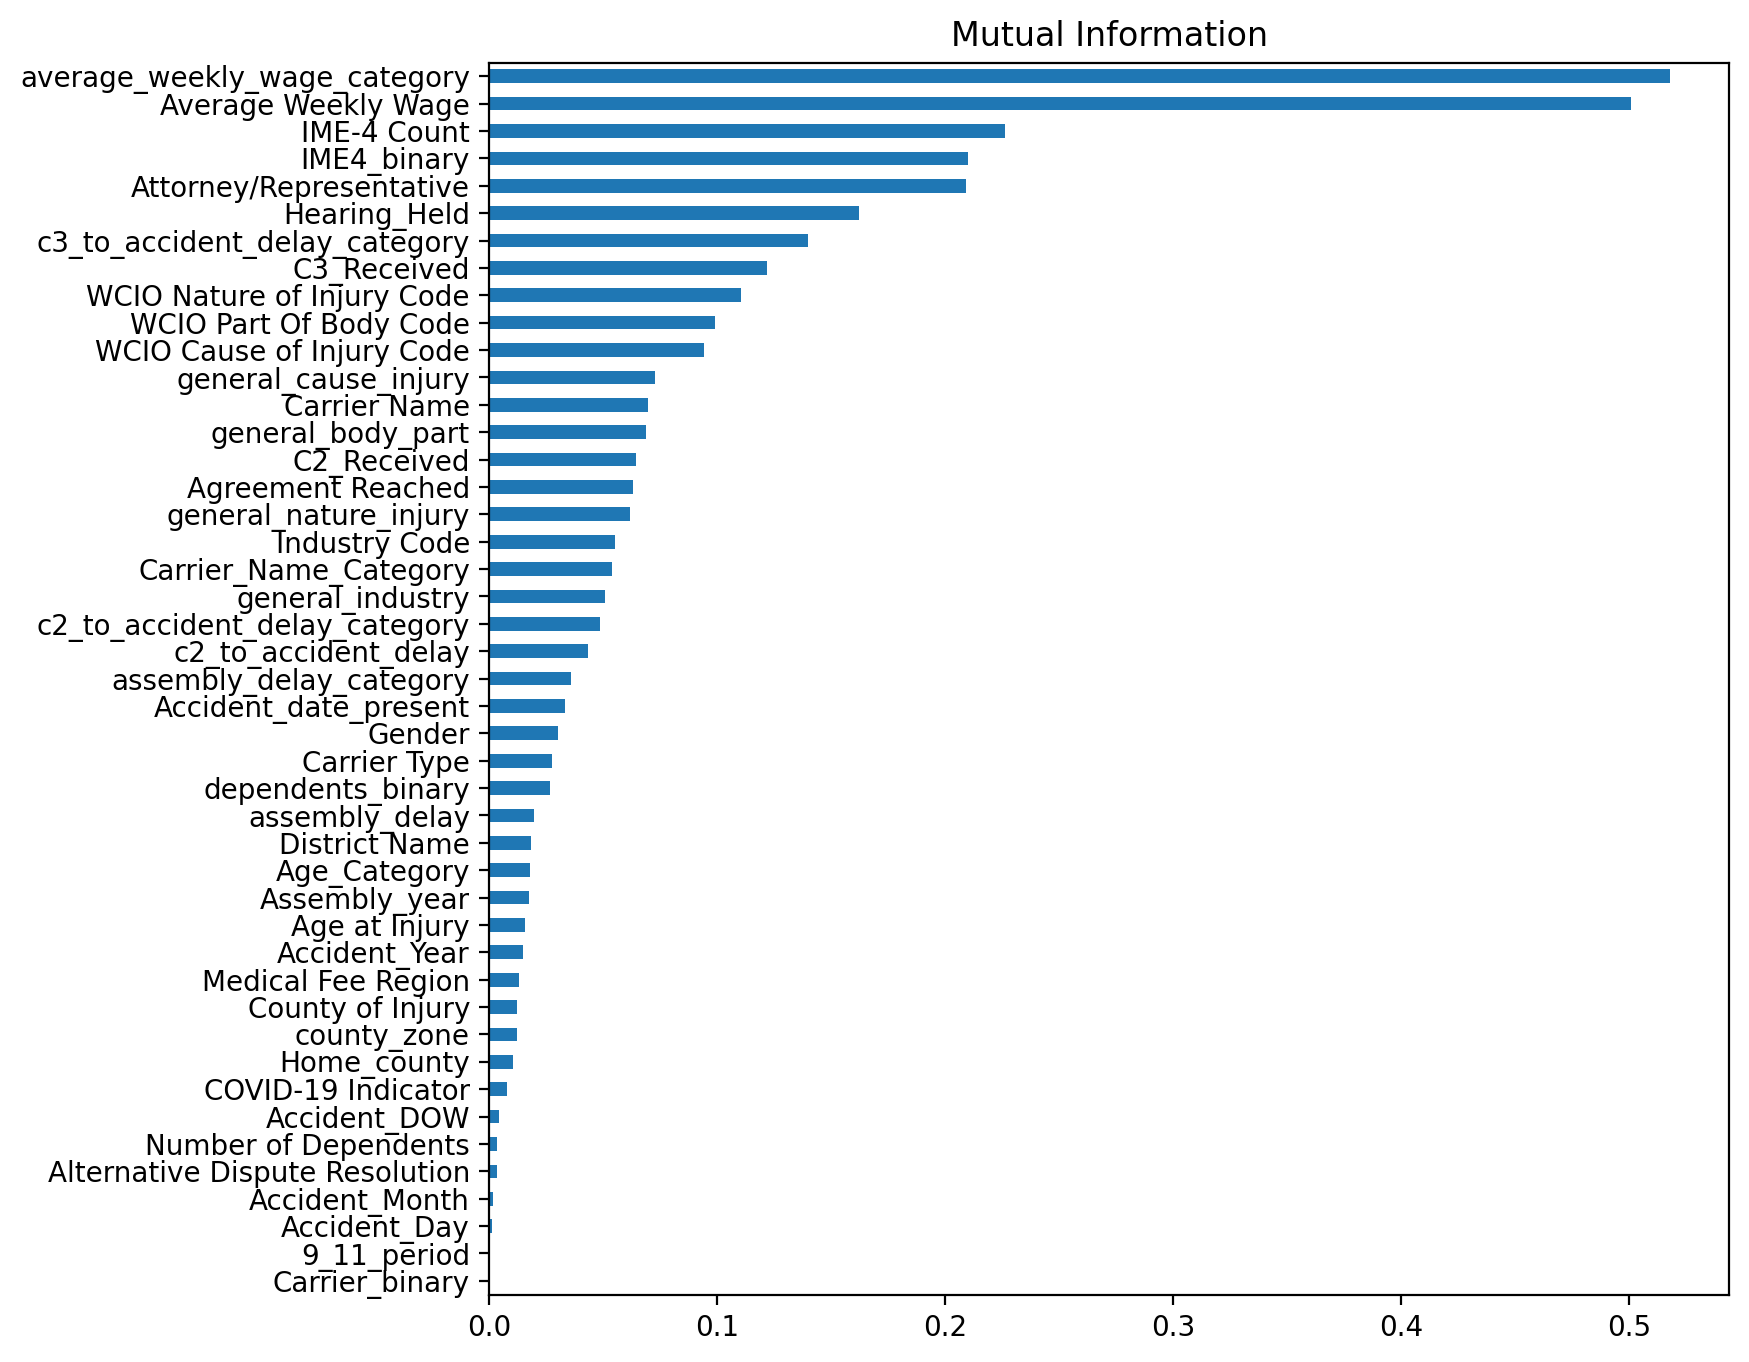

In [116]:
mi = mutual_info_classif(X_train_scaled, y_train)
mi = pd.Series(mi)
mi.index = X_train_scaled.columns
mi.sort_values(ascending=False)
mi.sort_values().plot(kind='barh', title = "Mutual Information", figsize=(8, 8))

In [117]:
low_mi_features = mi[mi < 0.005].index.tolist() 
# Print the list of low mutual information features 
print("Features with mutual information below 0.005:")
print(low_mi_features)

Features with mutual information below 0.005:
['Alternative Dispute Resolution', 'Number of Dependents', 'Accident_Month', 'Accident_DOW', 'Accident_Day', '9_11_period', 'Carrier_binary']


### Permutation Importance - Logistic: (Takes 20min to run)

In [118]:
# Initialize the Stratified K-Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression with multinomial option and class_weight='balanced'
#model = LogisticRegression(class_weight='balanced', max_iter=200, solver='saga', random_state=42, warm_start=True, C=1, verbose=1, multi_class='multinomial', n_jobs=-1)

# Define a scorer for Macro F1 Score
#macro_f1_scorer = make_scorer(f1_score, average='macro')

# Perform Stratified K-Fold Cross-Validation with Macro F1 Score
#scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring=macro_f1_scorer)
#print(f"Cross-Validation Scores (Macro F1): {scores}")
#print(f"Mean Cross-Validation Score (Macro F1): {scores.mean():.3f}")

# Split the data into training and validation sets
#X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
 #   X_train_scaled, y_train, random_state=42, shuffle=True, stratify=y_train, test_size=0.25)

# Train Logistic Regression on the split data
#model.fit(X_train_split, y_train_split)

# Evaluate the model on the validation set
#print(f"Model Score on Validation Set (Macro F1): {f1_score(y_val_split, model.predict(X_val_split), average='macro'):.3f}")

# Calculate permutation importance on the entire validation set
#r = permutation_importance(model, X_val_split, y_val_split, n_repeats=5, random_state=0, n_jobs=-1)

# Create a DataFrame for the permutation importance
#importance_df = pd.DataFrame({
 #   'Feature': X_train_scaled.columns,
  #  'Importance Mean': r.importances_mean,
   # 'Importance Std': r.importances_std
#}).sort_values(by='Importance Mean', ascending=False)

# Plot the feature importances
#plt.figure(figsize=(12, 15))
#plt.barh(importance_df['Feature'], importance_df['Importance Mean'], xerr=importance_df['Importance Std'], color='skyblue')
#plt.xlabel('Permutation Importance')
#plt.ylabel('Feature')
#plt.title('Feature Importances')
#plt.gca().invert_yaxis()
#plt.show()

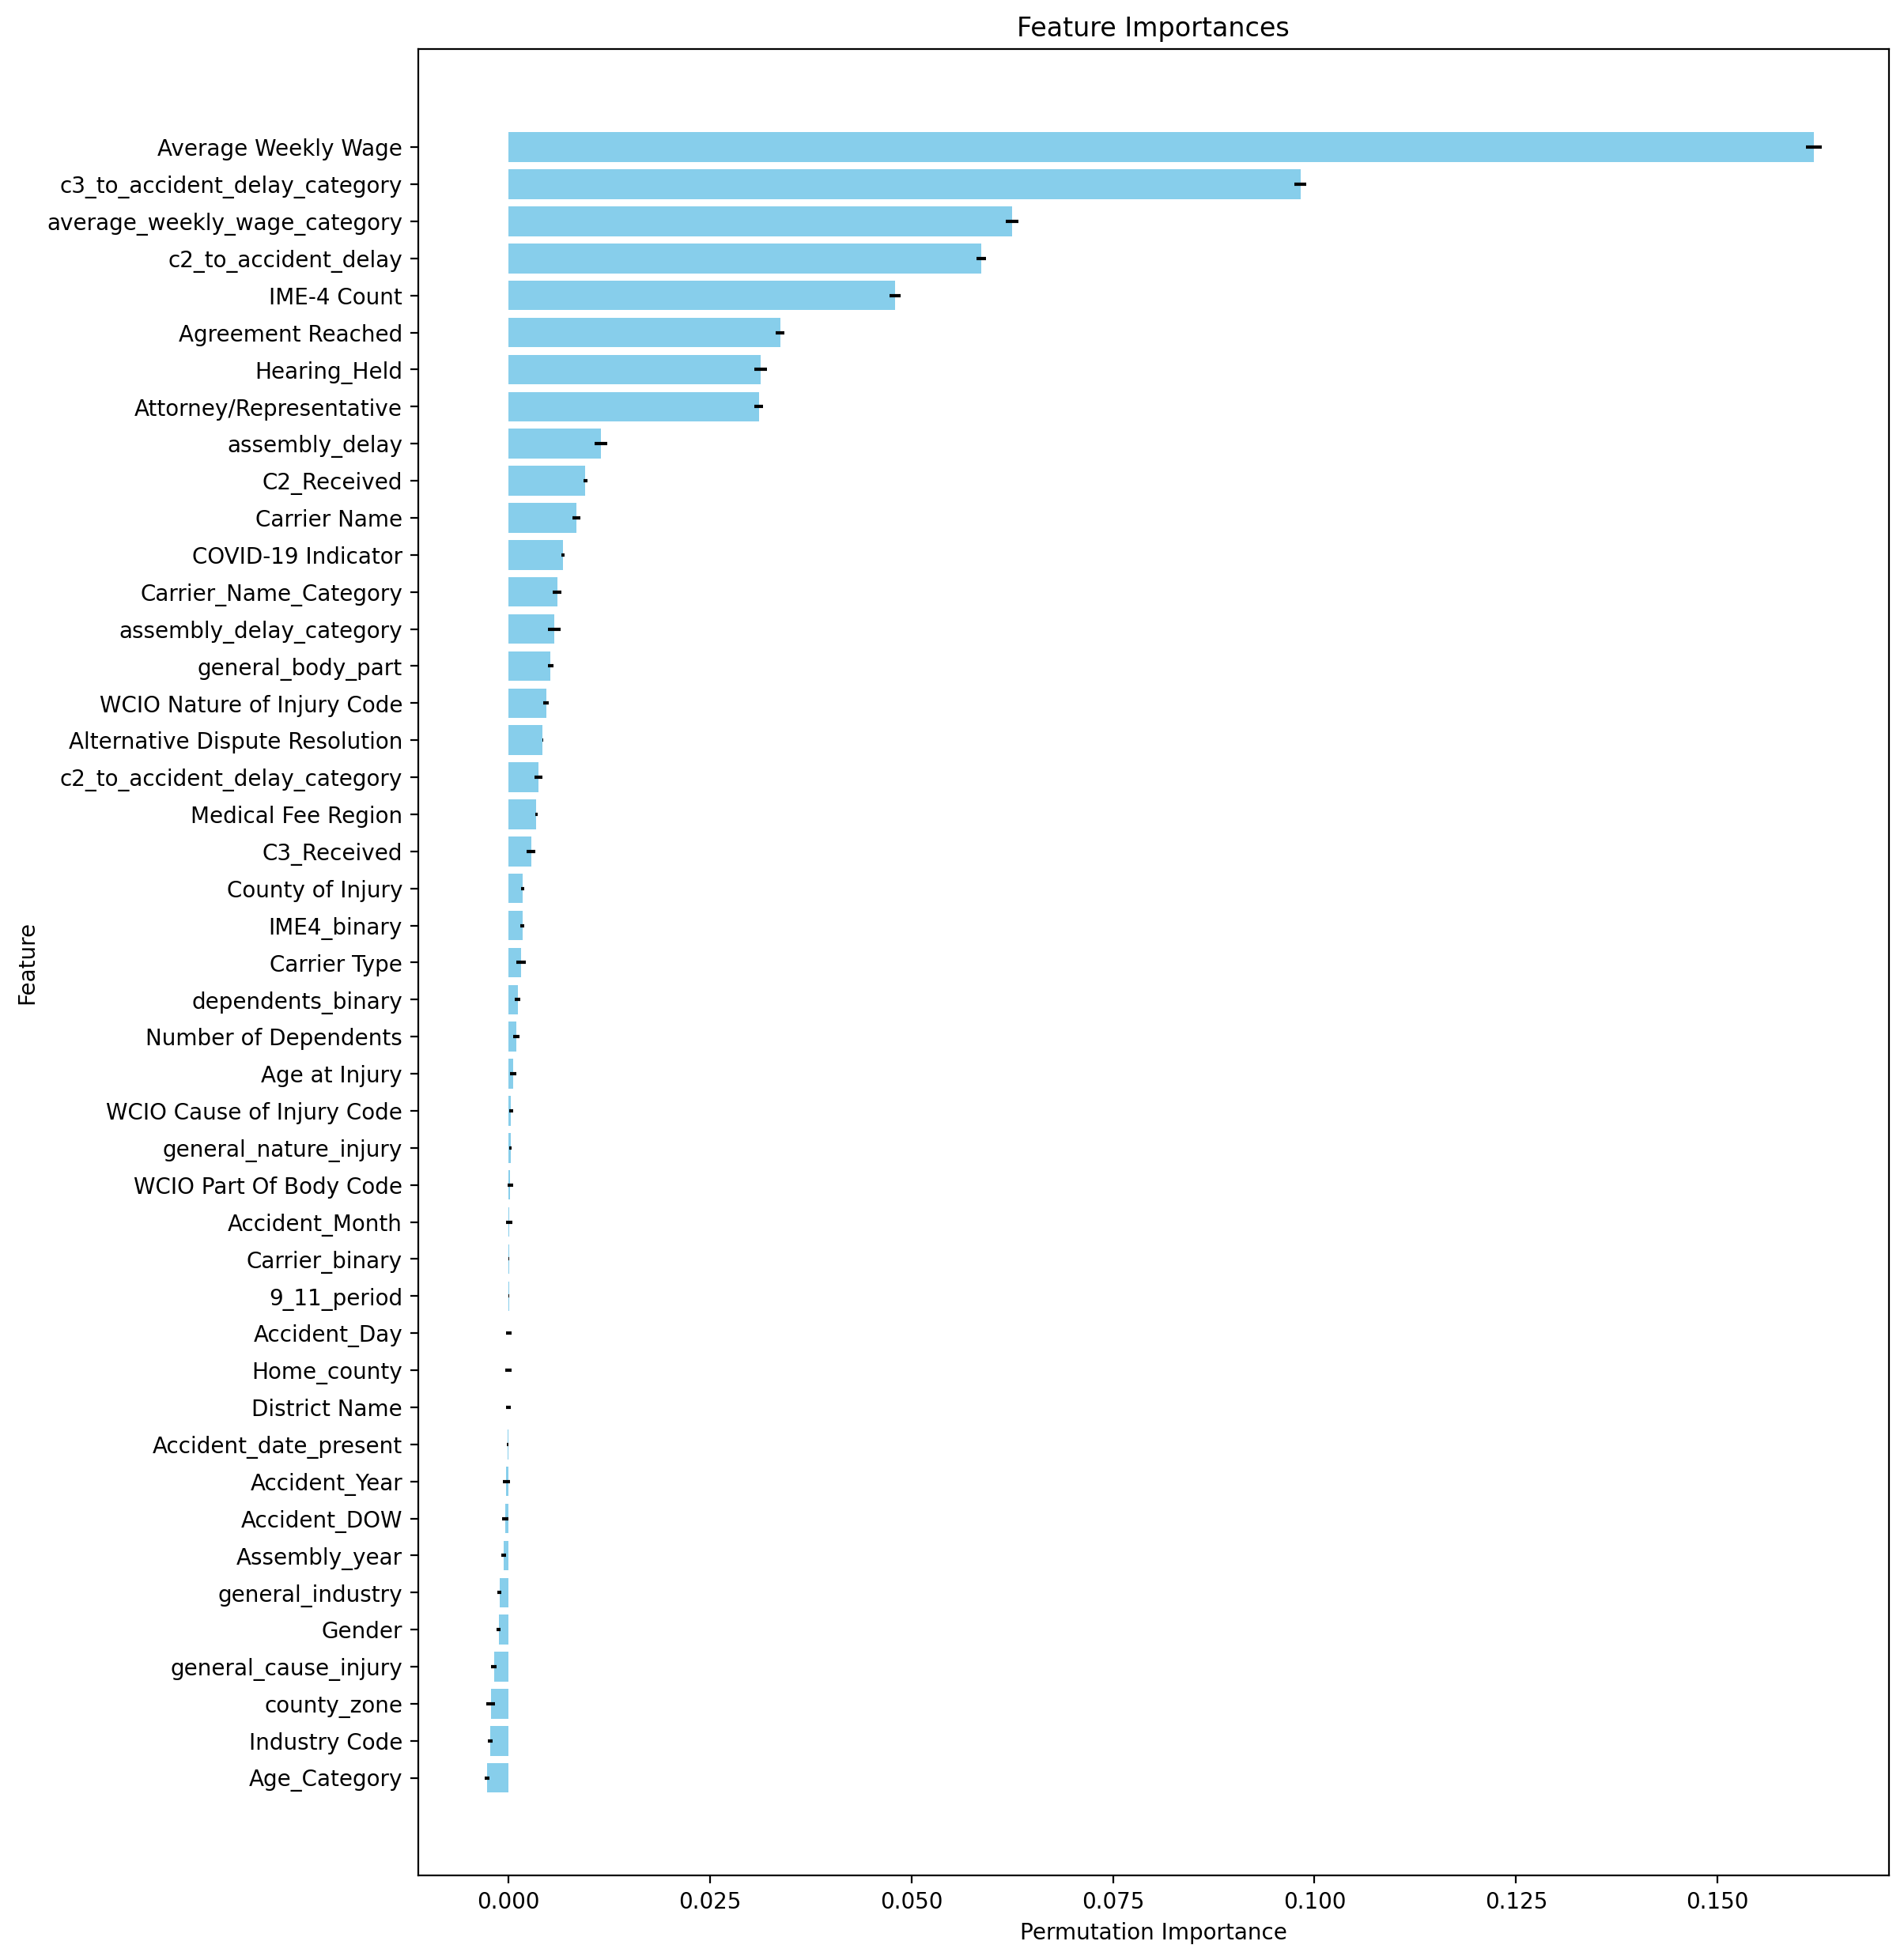

**FOR SOME REASON COULDN´T MAINTAIN OUTPUT, HOWEVER THESE ARE THE RESULTS.**

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers. <br>
max_iter reached after 174 seconds<br>
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.<br>
max_iter reached after 180 seconds<br>
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.<br>
max_iter reached after 178 seconds<br>
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.<br>
max_iter reached after 345 seconds<br>
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.<br>
max_iter reached after 299 seconds<br>
Cross-Validation Scores (Macro F1): [0.29566757 0.33414604 0.31264133 0.31189829 0.33850146]<br>
Mean Cross-Validation Score (Macro F1): 0.319<br>
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.<br>
max_iter reached after 272 seconds<br>
Model Score on Validation Set (Macro F1): 0.315<br>

In [119]:
# Get the list of features with importance below 0.0001
#low_importance_features_imp_lr = importance_df[importance_df['Importance Mean'] < 0.0001]['Feature'].tolist()

# Print the list of low importance features
#print("Features with importance below 0.0001:")
#print(low_importance_features_imp_lr)

In [120]:
low_importance_features_imp_lr = ['Carrier_binary', '9_11_period', 'Accident_Day', 'Home_county', 'District Name',
                                  'Accident_date_present', 'Accident_Year', 'Accident_DOW', 'Assembly_year',
                                  'general_industry', 'Gender', 'general_cause_injury', 'county_zone', 'Industry Code', 'Age_Category']

<a class="anchor" id="3rd-bullet">

## Embedded Methods:
    
</a>

### Lasso Regression

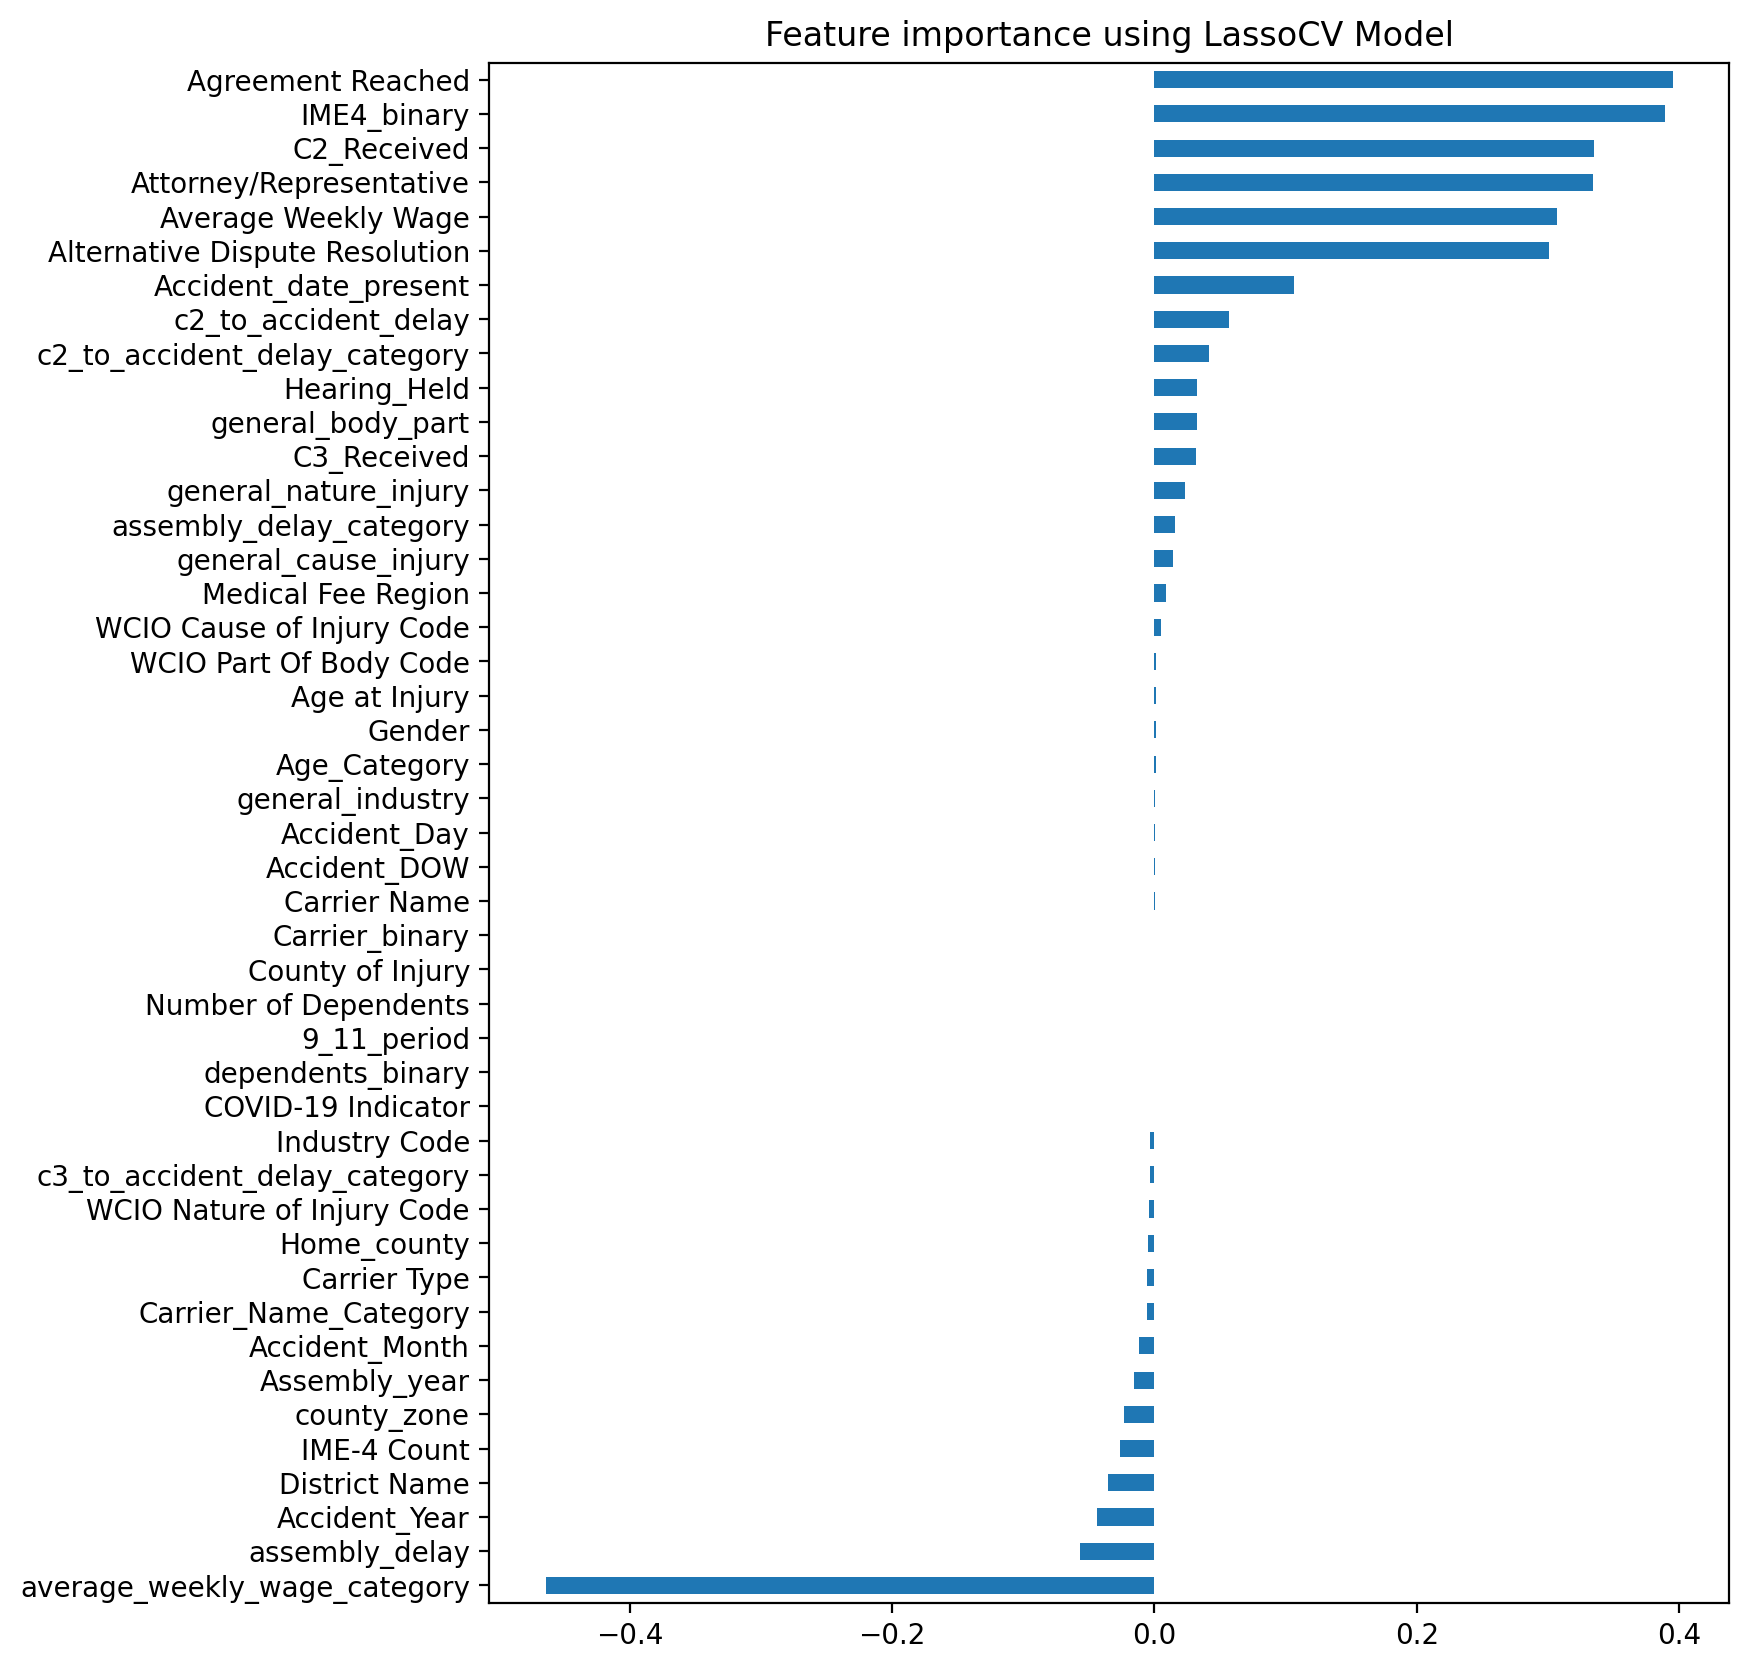

Selected features: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender',
       'IME-4 Count', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Agreement Reached', 'Age_Category',
       'Hearing_Held', 'C3_Received', 'C2_Received', 'Accident_date_present',
       'Accident_Month', 'Accident_Year', 'Accident_DOW', 'Accident_Day',
       'Assembly_year', 'assembly_delay', 'assembly_delay_category',
       'c2_to_accident_delay', 'c2_to_accident_delay_category',
       'c3_to_accident_delay_category', 'general_body_part',
       'general_cause_injury', 'general_industry', 'general_nature_injury',
       'Home_county', 'county_zone', 'Carrier_Name_Category', 'IME4_binary',
       'average_weekly_wage_category'],
      dtype='object')


In [121]:
#from sklearn.linear_model import LassoCV

# Function to plot feature importance
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

# Initialize LassoCV with StratifiedKFold
reg = LassoCV(cv=StratifiedKFold(n_splits=5))

# Fit the model
reg.fit(X_train_scaled, y_train)

# Get the coefficients
coef = pd.Series(reg.coef_, index=X_train_scaled.columns)

# Plot the feature importance
plot_importance(coef, "LassoCV")

# Get the selected features
selected_lasso = coef[coef != 0].index
print("Selected features:", selected_lasso)

In [122]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 40 variables and eliminated the other 5 variables


In [123]:
not_selected_lasso = coef[coef == 0].index
print("Selected features:", not_selected_lasso)

Selected features: Index(['County of Injury', 'Number of Dependents', '9_11_period',
       'dependents_binary', 'Carrier_binary'],
      dtype='object')


#### RFECV - Logistic - didn´t used for this model

In [124]:
#from sklearn.feature_selection import RFECV

# Define a custom scorer for F1 Macro
#f1_binary_scorer = make_scorer(f1_score, average="binary")

# Minimum number of features to consider
#min_features_to_select = 1  

# Initialize the classifier
#clf = LogisticRegression(class_weight="balanced", solver="saga", random_state=42)

# Stratified K-Fold Cross-Validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RFECV with F1 Macro as the scoring metric
#rfecv = RFECV(
 #   estimator=clf,
  #  step=1,
   # cv=cv,
    #scoring=f1_binary_scorer,  # Use F1 Macro as the scoring metric
    #min_features_to_select=min_features_to_select,
    #n_jobs=2,
#)

# Fit RFECV to the resampled training data
#rfecv.fit(X_train_scaled, y_train)

# Output the optimal number of features
#print(f"Optimal number of features: {rfecv.n_features_}")

# Get the ranking of features
#ranking = pd.DataFrame(
 #   {"Feature": X_train_scaled.columns, "Rank": rfecv.ranking_}
#).sort_values(by="Rank")

# Print the ranking of features
#print("Feature Rankings:")
#print(ranking)

# Get the cross-validation scores (mean test score) from the cv_results_ attribute
#cv_scores = rfecv.cv_results_['mean_test_score']

# Plot the RFECV cross-validation score
#plt.figure(figsize=(10, 6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross-validation score (F1 Macro)")
#plt.title("RFECV: Recursive Feature Elimination using F1 Binary")
#plt.plot(range(min_features_to_select, len(cv_scores) + min_features_to_select), cv_scores)
#plt.show()

In [125]:
# Sorting the feature rankings by highest importance (Rank = 1 is most important)
#sorted_ranking = ranking.sort_values(by="Rank", ascending=True)

# Plotting the sorted feature rankings
#plt.figure(figsize=(10, 10))
#plt.barh(sorted_ranking['Feature'], sorted_ranking['Rank'], color='steelblue')
#plt.xlabel('Rank (1 = most important)')
#plt.ylabel('Feature')
#plt.title('Feature Importance Based on RFECV Ranking (Lowest Rank = Most Important)')
#plt.gca().invert_yaxis()  # To have the most important feature at the top
#plt.show()

In [126]:
# Get the selected features based on RFECV
#selected_features = X_train_scaled.columns[rfecv.support_]

# Print the list of selected features
#print("Selected Features:")
#print(selected_features)

In [127]:
#selected_features = ['Alternative Dispute Resolution', 'Attorney/Representative',
 #      'Average Weekly Wage', 'Carrier Name', 'Carrier Type',
  #     'COVID-19 Indicator', 'Industry Code', 'Medical Fee Region',
   #    'WCIO Cause of Injury Code', 'Number of Dependents', 'Hearing_Held',
    #   'C3_Received', 'C2_Received', 'Accident_date_present', 'Accident_Month',
     #  'Accident_Year', 'Assembly_year', 'assembly_delay',
      # 'assembly_delay_category', 'c2_to_accident_delay',
       #'c3_to_accident_delay_category', '9_11_period', 'dependents_binary',
       #'general_industry', 'Carrier_binary', 'IME4_binary']

<a class="anchor" id="3rd-bullet">

## Decisions on Features:
    
</a>

**With the 5 methods used, we created a df to visualize and choose features that at least 3 methods told to discard/were not important:**

In [128]:
lasso_features = not_selected_lasso
ridge_features = low_importance_features_ridge
mutual_info = low_mi_features
highly_corr = correlated_features_list
importance_logistic = low_importance_features_imp_lr

features_dict = {}

# Add features to the dictionary with their corresponding lists
for feature in lasso_features:
    if feature not in features_dict:
        features_dict[feature] = {'Lasso': 'Discard', 'Ridge': 'Keep', 'Mutual_Info': 'Keep', 'Highly_Corr': 'Keep', 'Importance_Logistic': 'Keep'}
    else:
        features_dict[feature]['Lasso'] = 'Discard'

for feature in ridge_features:
    if feature not in features_dict:
        features_dict[feature] = {'Lasso': 'Keep', 'Ridge': 'Discard', 'Mutual_Info': 'Keep', 'Highly_Corr': 'Keep', 'Importance_Logistic': 'Keep'}
    else:
        features_dict[feature]['Ridge'] = 'Discard'

for feature in mutual_info:
    if feature not in features_dict:
        features_dict[feature] = {'Lasso': 'Keep', 'Ridge': 'Keep', 'Mutual_Info': 'Discard', 'Highly_Corr': 'Keep', 'Importance_Logistic': 'Keep'}
    else:
        features_dict[feature]['Mutual_Info'] = 'Discard'

for feature in highly_corr:
    if feature not in features_dict:
        features_dict[feature] = {'Lasso': 'Keep', 'Ridge': 'Keep', 'Mutual_Info': 'Keep', 'Highly_Corr': 'Discard', 'Importance_Logistic': 'Keep'}
    else:
        features_dict[feature]['Highly_Corr'] = 'Discard'

for feature in importance_logistic:
    if feature not in features_dict:
        features_dict[feature] = {'Lasso': 'Keep', 'Ridge': 'Keep', 'Mutual_Info': 'Keep', 'Highly_Corr': 'Keep', 'Importance_Logistic': 'Discard'}
    else:
        features_dict[feature]['Importance_Logistic'] = 'Discard'

# Convert the dictionary to a DataFrame
features_df = pd.DataFrame.from_dict(features_dict, orient='index').reset_index()
features_df.rename(columns={'index': 'Feature'}, inplace=True)

features_df


,Feature,Lasso,Ridge,Mutual_Info,Highly_Corr,Importance_Logistic
0,County of Injury,Discard,Discard,Keep,Discard,Keep
1,Number of Dependents,Discard,Discard,Discard,Keep,Keep
2,9_11_period,Discard,Keep,Discard,Keep,Discard
3,dependents_binary,Discard,Discard,Keep,Keep,Keep
4,Carrier_binary,Discard,Keep,Discard,Keep,Discard
5,Accident_Day,Keep,Discard,Discard,Keep,Discard
6,Accident_DOW,Keep,Discard,Discard,Keep,Discard
7,Age at Injury,Keep,Discard,Keep,Discard,Keep
8,Carrier Name,Keep,Discard,Keep,Keep,Keep
9,WCIO Part Of Body Code,Keep,Discard,Keep,Keep,Keep


In [129]:
# Count the number of "Discards" for each feature 
features_df['Discard_Count'] = features_df.apply(lambda row: sum(value == 'Discard' for value in row[1:]), axis=1)

# Get the list of features with at least 3 "Discards"
features_to_discard = features_df[features_df['Discard_Count'] >= 3]['Feature'].tolist() 

# Display the list of features to discard 
print(features_to_discard)

['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Accident_DOW', 'Age_Category']


### **We tried two methods on final decision for feature selection**:
1. Drop the discard ones by at least 3 of the 5 methods. Also variables with same info but agg in category or similar were also drop (the one with poorest perfomance);
2. Discard only the ones that at least 3 of the 5 methods told. We kept the categories as it could help the model to understand well the relations having more perspetives...

**Results**:
1. Despite this 1st way sound practical to reduce redundance, the model perform well (0.45 F1 Score Macro) and around 0.43 in Kaggle.
2. Maintaing some of the features that give the same info seemed to add a little extra perspetive and more data for the model to focus leading to a slightly better result in both validation F1 Macro 
(0.466) and Loss (0.50), also it gave us the best perfomance on Kaggle (0.447).

**Conclusion:** Discard only the 6 features told by at least 3 of the 5 methods.

#### **1st Way - Regarding the 2 features we generated for some of the variables, we will drop one of them based on the results we obtained using the above methods...**

In [130]:
X_train_scaled.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Number of Dependents', 'Age_Category',
       'Hearing_Held', 'C3_Received', 'C2_Received', 'Accident_date_present',
       'Accident_Month', 'Accident_Year', 'Accident_DOW', 'Accident_Day',
       'Assembly_year', 'assembly_delay', 'assembly_delay_category',
       'c2_to_accident_delay', 'c2_to_accident_delay_category',
       'c3_to_accident_delay_category', '9_11_period', 'dependents_binary',
       'general_body_part', 'general_cause_injury', 'general_industry',
       'general_nature_injury', 'Home_county', 'county_zone',
       'Carrier_Name_Category', 'Carrier_binary', 'IME

For instance, IME-4 binary overall perform better than the original one <br>
Average Weekly Wage Category perform better than original one <br>
On the other hand, c2_to_Accident delay was better than categorized.<br>
The grouped WCIO were dropped since it performs worse than original ones overall

In [131]:
# Select features that are not in the discard list 
X_train_selected = X_train_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category',
                                                'Carrier_Name_Category', 'dependents_binary', 'Assembly_year', 'c2_to_accident_delay_category',
                                                'Average Weekly Wage', 'IME-4 Count',
                                                'general_cause_injury', 'general_nature_injury', 'general_industry', 'general_body_part']) 
X_val_selected = X_val_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category',
                                                'Carrier_Name_Category', 'dependents_binary', 'Assembly_year', 'c2_to_accident_delay_category',
                                                'Average Weekly Wage', 'IME-4 Count',
                                                'general_cause_injury', 'general_nature_injury', 'general_industry', 'general_body_part']) 
X_test_selected = X_test_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category',
                                                'Carrier_Name_Category', 'dependents_binary', 'Assembly_year', 'c2_to_accident_delay_category',
                                                'Average Weekly Wage', 'IME-4 Count',
                                                'general_cause_injury', 'general_nature_injury', 'general_industry', 'general_body_part'])

In [132]:
X_train_selected.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'COVID-19 Indicator', 'District Name', 'Gender', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Agreement Reached', 'Hearing_Held', 'C3_Received', 'C2_Received',
       'Accident_date_present', 'Accident_Month', 'Accident_Year',
       'Accident_DOW', 'assembly_delay', 'assembly_delay_category',
       'c2_to_accident_delay', 'c3_to_accident_delay_category', 'Home_county',
       'county_zone', 'IME4_binary', 'average_weekly_wage_category'],
      dtype='object')

#### **2. Way - Drop only discard by model**

In [133]:
# Select features that are not in the discard list 
X_train_base = X_train_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category'])
X_val_base = X_val_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category'])
X_test_base = X_test_scaled.drop(columns=['County of Injury', 'Number of Dependents', '9_11_period', 'Carrier_binary', 'Accident_Day', 'Age_Category'])

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 7. Models Multiclass - Selected one - Stack with XGBoost, MLP and Naive Bayes
    

    
</div>

**We tested many models, but HistGradientBoosting, MLP Classifier and XGBoost consistently delivered better performance while being time-efficient.**  

1. We decided to test various parameters on **HGBC** and apply similar adjustments to **Random Forest** (since they are similar models) to prevent overfitting and help balance the minority classes.  
2. For **XGBoost**, it was our best model with just a few parameters, so we opted to use **Grid Search** to fine-tune the model further.  
3. In the case of **MLP** which is was also a good perfomer, we used fewer neurons than the number of features, a low learning rate, and the **Adam optimizer**.  
4. For **Logistic Regression**, we adjusted the class weights to give more importance to the minority classes.


**Regarding the metrics, the group used the following:**

- **Accuracy**: A straightforward metric to assess the model's ability to classify new instances correctly.
  
- **Macro F1 Score**: Particularly useful in this case due to the uneven class distributions. This metric ensures that each class contributes equally to the overall score, regardless of class size.

- **Log Loss**: Evaluates model performance by comparing predicted probabilities to actual class labels. It penalizes incorrect predictions more heavily, providing a more rigorous measure of the model's effectiveness.


In [177]:
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1
y_train_adjusted.value_counts()

claim_injury_code
1    203754
3    103955
2     48234
4     33796
0      8734
5      2948
7       329
6        68
Name: count, dtype: Int64

#### SMOTE (Not worth it in our case)

We chose to preserve the original data instead of applying oversampling techniques like SMOTE. Although the cross-validation results were higher with SMOTE, the performance on the validation set remained the same. Additionally, we wanted to avoid overfitting our model, so we decided against using SMOTE.


In [ ]:
#X_train_scaled = X_train_scaled.astype(float)
#X_val_scaled = X_val_scaled.astype(float)
#X_test_scaled = X_test_scaled.astype(float)

#y_train = y_train.astype(float)
#y_val = y_val.astype(float)
#from collections import Counter

# Step 1: Check original class distribution
#print("Original class distribution:", Counter(y_train))

# Step 3: Apply SMOTE for oversampling with the custom sampling strategy
#smote = SMOTE( random_state=42, k_neighbors=3)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Check class distribution after resampling
#print("After SMOTE, class distribution:", Counter(y_train_resampled))

<a class="anchor" id="3rd-bullet">

## Function Train vs Validation:
    
</a>

In [140]:
def avg_score(model):
    # Apply kfold
    skf = StratifiedKFold(n_splits=5)
    
    def process_fold(train_index, test_index):
        # Get the indexes of the observations assigned for each partition
        X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        # Start counting time
        begin = time.perf_counter()
        # Fit the model to the data
        model.fit(X_train_fold, y_train_fold)
        # Finish counting time
        end = time.perf_counter()
        # Check the mean F1 Score for the train
        train_pred = model.predict(X_train_fold)
        value_train = f1_score(y_train_fold, train_pred, average='macro')
        # Check the mean F1 Score for the test
        test_pred = model.predict(X_val_scaled)
        value_test = f1_score(y_val, test_pred, average='macro')
        # Return the results
        return value_train, value_test, end - begin
    
    # Use joblib to parallelize the cross-validation process
    results = Parallel(n_jobs=-1)(delayed(process_fold)(train_index, test_index) for train_index, test_index in skf.split(X_train_scaled, y_train))
    
    # Unpack the results
    score_train, score_test, timer = zip(*results)
    
    # Calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer), 3)
    avg_train = round(np.mean(score_train), 3)
    avg_test = round(np.mean(score_test), 3)
    std_time = round(np.std(timer), 2)
    std_train = round(np.std(score_train), 2)
    std_test = round(np.std(score_test), 2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train), str(avg_test) + '+/-' + str(std_test)


In [141]:
# for MLP SCORE KAGGLE
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # For each model passed as argument
    for arg in args:
        # Obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # Store the results in the right row
        df.iloc[count] = [time, avg_train, avg_test, 'N/A']  # Add 'N/A' for the 'Iterations' column
        count += 1
    return df


In [142]:
# for test RandomForest

def show_results_rfc(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # For each model passed as argument
    for arg in args:
        # Obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # Store the results in the right row
        df.iloc[count] = [time, avg_train, avg_test]  # Ensure the results are stored as a list
        count += 1
    return df


<a class="anchor" id="3rd-bullet">

## HistGradientBoostingClassifier:
    
</a>

#### Parameters:

Define the max depth of a tree is very important to prevent overfitting. Also, if we don´t allow the tree to grow a little (2/3) this is likely to underfit as it don´t capture much information

We choose a higher depth (8) in this case since it´s not overfitting.

In [ ]:
#hgb_low_depth = HistGradientBoostingClassifier(max_depth = 5).fit(X_train_selected, y_train)
#hgb_medium_dept = HistGradientBoostingClassifier(max_depth = 8).fit(X_train_selected, y_train)

#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['low','medium'])
#show_results_rfc(df, hgb_low_depth, hgb_medium_dept)

,Time,Train,Test
low,36.009+/-13.69,0.421+/-0.02,0.403+/-0.01
medium,28.196+/-10.83,0.435+/-0.02,0.415+/-0.01


**In this field, it´s common not to use all features to search for the best split, also it can help prevent overfit**

In this case, will select around 0.7/0.8 for less computational cost and better score on validation

In [ ]:
#low_max_features = HistGradientBoostingClassifier(max_features= 0.3).fit(X_train_selected, y_train)
#med_max_features = HistGradientBoostingClassifier(max_features = 0.6).fit(X_train_selected, y_train)
#high_max_features = HistGradientBoostingClassifier(max_features = 0.9).fit(X_train_selected, y_train)

#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['low','medium', 'high'])
#show_results_rfc(df, low_max_features, med_max_features, high_max_features)

,Time,Train,Test
low,31.524+/-5.19,0.434+/-0.01,0.407+/-0.01
medium,29.73+/-7.17,0.428+/-0.01,0.408+/-0.01
high,26.445+/-6.21,0.44+/-0.01,0.414+/-0.0


**This parameter is also very important for the same reasons (overfitting):**
1. A small value will definitely overfit due to the minimum number of samples required to be at a leaf node to be too small;
2. On the other hand, if we insert a high value it can lead to overfit

based on these result will select a value between 10 and 100 (like 50)

In [ ]:
#low_min_samples_split = HistGradientBoostingClassifier(min_samples_leaf= 1).fit(X_train_selected, y_train)
#med_min_samples_split = HistGradientBoostingClassifier(min_samples_leaf= 10).fit(X_train_selected, y_train)
#hig_min_samples_split = HistGradientBoostingClassifier(min_samples_leaf= 100).fit(X_train_selected, y_train)

#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['10', '100', '300'])
#show_results_rfc(df, low_min_samples_split, med_min_samples_split,hig_min_samples_split)

,Time,Train,Test
10,25.79+/-5.59,0.492+/-0.02,0.418+/-0.0
100,30.309+/-3.7,0.446+/-0.01,0.414+/-0.01
300,48.229+/-16.25,0.46+/-0.03,0.423+/-0.01


the labels above on results should be 1 / 10 / 100

Based on those results will try to select a lr between 0.01 and 0.1 (closer to 0.1) since it prevents overfit. (with other parameters on it can help the overfit)

In [146]:
#low_lr = HistGradientBoostingClassifier(learning_rate= 0.01).fit(X_train_selected, y_train)
#med_lr = HistGradientBoostingClassifier(learning_rate = 0.1).fit(X_train_selected, y_train)
#high_lr = HistGradientBoostingClassifier(learning_rate = 0.3).fit(X_train_selected, y_train)

#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['low','medium', 'high'])
#show_results_rfc(df, low_lr, med_lr, high_lr)

,Time,Train,Test
low,149.335+/-0.37,0.548+/-0.0,0.417+/-0.0
medium,25.49+/-6.43,0.437+/-0.01,0.415+/-0.01
high,15.711+/-0.61,0.414+/-0.01,0.399+/-0.01


Define the total number of lead nodes

In [147]:
#low_max_nodes = HistGradientBoostingClassifier(max_leaf_nodes = 5).fit(X_train_selected, y_train)
#high_max_nodes = HistGradientBoostingClassifier(max_leaf_nodes = 10).fit(X_train_selected, y_train)

#df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['low', 'high'])
#show_results_rfc(df, low_max_nodes, high_max_nodes)

,Time,Train,Test
low,35.721+/-12.09,0.395+/-0.01,0.389+/-0.01
medium,22.059+/-9.43,0.411+/-0.02,0.398+/-0.01
high,NaN,NaN,NaN


#### Model HistGradientBoostClassifier:

In [178]:
# Define the scoring metrics: accuracy, weighted F1 score, and log loss
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Initialize the HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier(
    max_iter=250,                 # Number of boosting stages
    learning_rate=0.05,            # Step size shrinkage
    max_depth=7,                  # Maximum depth of individual trees
    min_samples_leaf=50,          # Minimum samples required in a leaf node
    max_leaf_nodes=10,             # Maximum number of leaf nodes
    max_bins=255,                 # Maximum number of bins for histogram binning
    verbose=1,                    # Verbose output
    random_state=42,
    scoring='loss',       # Loss function
    warm_start=True,
    max_features=0.8,
    class_weight='balanced')

# Perform a 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_hgb = cross_validate(hist_gb_model, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Display the cross-validation results
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results_hgb['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results_hgb['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results_hgb['test_log_loss']):.4f}")


Binning 0.090 GB of training data: 0.363 s
Binning 0.010 GB of validation data: 0.000 s
Fitting gradient boosted rounds:
[1/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.91472, val loss: 1.94327, in 0.127s
[2/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.78706, val loss: 1.82365, in 0.122s
[3/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.68296, val loss: 1.73121, in 0.117s
[4/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.59599, val loss: 1.65987, in 0.115s
[5/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.52110, val loss: 1.59638, in 0.112s
[6/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.45604, val loss: 1.54322, in 0.116s
[7/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.39874, val loss: 1.49523, in 0.133s
[8/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.34775, val loss: 1.45152, in 0.118s
[9/250] 8 trees, 80 leaves (10 on avg),

In [179]:
hist_gb_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_gb = hist_gb_model.predict(X_val_base)
val_probabilities_gb = hist_gb_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_gb = accuracy_score(y_val_adjusted, val_predictions_gb)
val_f1_macro_gb = f1_score(y_val_adjusted, val_predictions_gb, average='macro') 
val_log_loss_gb = log_loss(y_val_adjusted, val_probabilities_gb)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_gb:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_gb:.4f}") 
print(f"Log Loss: {val_log_loss_gb:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_gb, digits=3))

Binning 0.113 GB of training data: 0.410 s
Binning 0.013 GB of validation data: 0.000 s
Fitting gradient boosted rounds:
[1/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.91550, val loss: 1.92500, in 0.173s
[2/250] 8 trees, 80 leaves (10 on avg), max depth = 6, train loss: 1.79406, val loss: 1.81676, in 0.195s
[3/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.69431, val loss: 1.72852, in 0.188s
[4/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.60838, val loss: 1.64849, in 0.183s
[5/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.53378, val loss: 1.58619, in 0.192s
[6/250] 8 trees, 80 leaves (10 on avg), max depth = 6, train loss: 1.47271, val loss: 1.52842, in 0.196s
[7/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.41636, val loss: 1.47716, in 0.195s
[8/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.36482, val loss: 1.43127, in 0.188s
[9/250] 8 trees, 80 leaves (10 on avg),

In [688]:
#test_predictions = hist_gb_model.predict(X_test_selected)             # predict on the test set
#test_probabilities = hist_gb_model.predict_proba(X_test_selected)     # get the class probabilities

# Store the predictions in a DataFrame
#test_results = pd.DataFrame({
 #   'Prediction': test_predictions,
  #  'Class_Probabilities': list(test_probabilities)  # Stores probabilities as lists
#})

#test_results.head()

,Prediction,Class_Probabilities
0,2.0,"[0.005118918149176416, 0.6866381953701789, 0.0..."
1,2.0,"[0.010148240172193186, 0.7025491472215131, 0.0..."
2,2.0,"[0.003893542871968963, 0.8959362576783921, 0.0..."
3,2.0,"[0.004725382366966095, 0.9147741790293628, 0.0..."
4,2.0,"[0.006713167227171528, 0.9143816381342235, 0.0..."


In [689]:
# Mapping dictionary to convert the integer predictions to the full labels
#label_mapping = {
 #   1: '1. CANCELLED',
  #  2: '2. NON-COMP',
   # 3: '3. MED ONLY',
    #4: '4. TEMPORARY',
    #5: '5. PPD SCH LOSS',
    #6: '6. PPD NSL',
    #7: '7. PTD',
    #8: '8. DEATH'
#}
#test_predictions_full_labels = [label_mapping[pred] for pred in test_predictions]

# Submission DataFrame using the index as Claim Identifier
#submission_df = pd.DataFrame({
 #   'Claim Identifier': X_test.index,
  #  'Claim Injury Type': test_predictions_full_labels
#})

# Export the submission DataFrame to a CSV file
#submission_df.to_csv("Group11_Version11.csv", index=False)

#submission_df.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


<a class="anchor" id="3rd-bullet">

## XGBoost (best perfomer individual):
    
</a>

**XGBoost** is a highly efficient and powerful machine learning algorithm that belongs to the family of **gradient boosting models**. It is widely used for both **regression** and **classification tasks**, especially when dealing with large datasets and complex patterns.

XGBoost works by iteratively fitting decision trees on the residuals of previous trees, continuously improving its predictions. This iterative process allows it to be fine-tuned for optimal performance.

---

#### **Key Features**:

1. **Regularization**  
   XGBoost incorporates both **L1 (Lasso)** and **L2 (Ridge)** regularization. This helps in reducing **overfitting** and improves the model's **generalization** by penalizing complex models.

2. **Handling Imbalanced Classes**  
   XGBoost can handle imbalanced datasets effectively by using the **`scale_pos_weight`** parameter. This adjusts the weight given to each class, ensuring that the model does not become biased toward the majority class.

3. **Custom Objective Functions**  
   XGBoost allows for **custom objective functions** to be defined. For multi-class problems, the **`multi:softprob`** objective is used, which outputs a **probability distribution** over all possible classes, making it suitable for **multi-class classification** tasks.

4. **Efficiency**  
   XGBoost is optimized for **speed** and can handle **large datasets** efficiently. It also has built-in support for handling **missing values**, further enhancing its flexibility.


#### Grid Search:

In [134]:
y_train_adjusted = y_train - 1 # model target has to start at 0 Zero WHEN it´s XGBoost

In [135]:
y_val_adjusted = y_val - 1 # model target has to start at 0 Zero WHEN it´s XGBoost

In [153]:
# Define the scoring metrics: accuracy, weighted F1 score, and log loss
#scoring = {
 #   'accuracy': 'accuracy',
  #  'f1_macro': make_scorer(f1_score, average='macro'),
   # 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#}

# Calculate the number of samples for each class ----> Improve Class Imbalanced
#class_counts = np.bincount(y_train_adjusted)
#total_samples = len(y_train_adjusted)

# Calculate scale_pos_weight for each class
#scale_pos_weight = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Initialize the XGBoost model
#xgb_model = XGBClassifier(
 #   use_label_encoder=False,      # Disable the use of the label encoder
  #  eval_metric='logloss',        # Evaluation metric
   # objective='multi:softprob',    # Objective function for multi-class classification
    #random_state=42,
    #scale_pos_weight=scale_pos_weight,
    #gamma = 0.01
#)

# Define the parameter grid for hyperparameter tuning
#param_grid = {
 #   'n_estimators': [100, 200],
  #  'learning_rate': [0.01, 0.15],
   # 'max_depth': [4, 7],
    #'min_child_weight': [1, 10],
    #'max_delta_step': [1, 5],
    #'reg_lambda': [0.1, 1],
    #'reg_alpha': [0.01, 0.1]}

# Initialize Stratified K-Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
#grid_search = GridSearchCV(
 #   estimator=xgb_model,
  #  param_grid=param_grid,
   # scoring=scoring,
    #refit='f1_macro',  # Refit the model using the best parameter combination for f1_macro
    #cv=skf,
    #n_jobs=-1,
    #verbose=2
#)

# Fit the model using GridSearchCV
#grid_search.fit(X_train_scaled, y_train_adjusted)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print(f"Best Parameters: {best_params}")
#print(f"Best Macro F1 Score: {best_score:.4f}")

# Perform a 5-fold cross-validation with the best parameters
#xgb_best_model = grid_search.best_estimator_
#cv_results = cross_validate(xgb_best_model, X_train_scaled, y_train_adjusted, cv=skf, scoring=scoring)

# Display the cross-validation results
#print("Cross-Validation Results:")
#print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
#print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
#print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")


The output disappeared if we run all, so below the output in Markdown:

Fitting 5 folds for each of 128 candidates, totalling 640 fits <br>
Best Parameters: {'learning_rate': 0.15, 'max_delta_step': 1, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 1} <br>
Best Macro F1 Score: 0.4648<br>
Cross-Validation Results:<br>
Accuracy: 0.8120<br>
Macro F1 Score: 0.4648<br>
Log Loss: 0.5008<br>

#### Model:

In [136]:

# Define the scoring metrics: accuracy, weighted F1 score, and log loss
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Calculate the number of samples for each class ----> Improve Class Imbalanced
class_counts = np.bincount(y_train_adjusted)
total_samples = len(y_train_adjusted)

# Calculate scale_pos_weight for each class
scale_pos_weight = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=250,             # Number of boosting stages
    learning_rate=0.10,            # Step size shrinkage
    max_depth=7,                  # Maximum depth of individual trees
    min_child_weight=10,         # Minimum sum of instance weight (hessian) needed in a child
    max_delta_step=1,             # Maximum delta step we allow each tree's weight estimation to be
    verbosity=2,                  # Verbose output
    random_state=42,
    use_label_encoder=False,      # Disable the use of the label encoder
    eval_metric='logloss',        # Evaluation metric
    reg_lambda=1,                 # L2 regularization term on weights
    reg_alpha=0.01,               # L1 regularization term on weights
    objective='multi:softprob',     # Objective function for multi-class classification
    gamma = 0.01,
    scale_pos_weight=scale_pos_weight
)

# Perform a 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(xgb_model, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Display the cross-validation results
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")

Cross-Validation Results:
Accuracy: 0.8118
Macro F1 Score: 0.4653
Log Loss: 0.5006


In [137]:
xgb_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_xgb = xgb_model.predict(X_val_base)
val_probabilities_xgb = xgb_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_xgb = accuracy_score(y_val_adjusted, val_predictions_xgb)
val_f1_macro_xgb = f1_score(y_val_adjusted, val_predictions_xgb, average='macro') 
val_log_loss_xgb = log_loss(y_val_adjusted, val_probabilities_xgb)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_xgb:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_xgb:.4f}") 
print(f"Log Loss: {val_log_loss_xgb:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_xgb, digits=3))

Validation Results:
Accuracy: 0.8123
Macro F1 Score: 0.4660
Log Loss: 0.5003

Classification Report:
              precision    recall  f1-score   support

         0.0      0.746     0.528     0.619      3743
         1.0      0.863     0.980     0.918     87324
         2.0      0.584     0.102     0.174     20672
         3.0      0.767     0.903     0.829     44552
         4.0      0.699     0.686     0.692     14484
         5.0      0.246     0.013     0.024      1263
         6.0      0.000     0.000     0.000        29
         7.0      0.680     0.362     0.472       141

    accuracy                          0.812    172208
   macro avg      0.573     0.447     0.466    172208
weighted avg      0.784     0.812     0.773    172208



In [168]:
test_predictions_xgb = xgb_model.predict(X_test_base)             # predict on the test set
test_probabilities_xgb = xgb_model.predict_proba(X_test_base)     # get the class probabilities

# Store the predictions in a DataFrame
test_results_xgb = pd.DataFrame({
    'Prediction': test_predictions_xgb,
    'Class_Probabilities': list(test_probabilities_xgb)})

test_results_xgb.head()

,Prediction,Class_Probabilities
0,1,"[0.0014406332, 0.72117656, 0.09129189, 0.18545..."
1,1,"[0.012693246, 0.8931445, 0.05790143, 0.0359788..."
2,1,"[0.0013020195, 0.91691554, 0.08155508, 0.00020..."
3,1,"[0.0038427538, 0.9291917, 0.06686149, 7.271633..."
4,1,"[0.004065986, 0.9283187, 0.06752216, 6.8777284..."


In [171]:
# Mapping dictionary to convert the integer predictions to the full labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}
test_predictions_full_labels = [label_mapping[pred] for pred in test_predictions_xgb]

# Submission DataFrame using the index as Claim Identifier
submission_df = pd.DataFrame({
    'Claim Identifier': X_test_base.index,
    'Claim Injury Type': test_predictions_full_labels
})

# Export the submission DataFrame to a CSV file
submission_df.to_csv("Group11_Version16_xgb.csv", index=False)

submission_df.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


In [172]:
submission_df["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        305066
4. TEMPORARY        63032
3. MED ONLY         11388
1. CANCELLED         5798
5. PPD SCH LOSS      2663
8. DEATH               28
Name: count, dtype: int64

<a class="anchor" id="3rd-bullet">

## Random Forest Classifier:
    
</a>

In [178]:
# Define the scoring metrics: accuracy, weighted F1 score, and log loss
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

rf_model = RandomForestClassifier(n_estimators=120, random_state=42, min_samples_split=30, criterion="gini", class_weight='balanced', verbose=True,
                                   max_depth=7, max_features=0.8, min_impurity_decrease=0.02, max_leaf_nodes=12, min_samples_leaf=30)  # initialize the model

# Perform a 10-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_model, X_train_base, y_train, cv=skf, scoring=scoring)

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Cross-Validation Results:
Accuracy: 0.6276
Macro F1 Score: 0.3023
Log Loss: 1.2590


In [179]:
rf_model.fit(X_train_base, y_train)

# Evaluate the model on the validation set 
val_predictions = rf_model.predict(X_val_base)
val_probabilities = rf_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy = accuracy_score(y_val, val_predictions)
val_f1_macro = f1_score(y_val, val_predictions, average='macro') 
val_log_loss = log_loss(y_val, val_probabilities)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy:.4f}") 
print(f"Macro F1 Score: {val_f1_macro:.4f}") 
print(f"Log Loss: {val_log_loss:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predictions, digits=3))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   24.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Validation Results:
Accuracy: 0.6271
Macro F1 Score: 0.3025
Log Loss: 1.2627

Classification Report:
              precision    recall  f1-score   support

         1.0      0.386     0.569     0.460      3743
         2.0      0.836     0.912     0.872     87324
         3.0      0.000     0.000     0.000     20672
         4.0      0.637     0.391     0.485     44552
         5.0      0.436     0.570     0.494     14484
         6.0      0.043     0.308     0.076      1263
         7.0      0.002     0.724     0.004        29
         8.0      0.015     0.695     0.029       141

    accuracy                          0.627    172208
   macro avg      0.294     0.521     0.303    172208
weighted avg      0.634     0.627     0.620    172208



<a class="anchor" id="3rd-bullet">

## MLP - Neural Networks:
    
</a>

**Multilayer Perceptron (MLP)** is a type of neural network that consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. MLP is particularly well-suited for complex problems, including **multiclass classification**.

**Why MLP is Ideal for Multiclass Problems:**

1. **Flexibility in Modeling Complex Relationships**: 
   - MLPs can model highly complex, non-linear relationships between input features and target classes. The presence of hidden layers allows the network to learn intricate patterns and dependencies that might be missed by simpler models like linear classifiers.

2. **Multiclass Capability**:
   - MLP can easily handle **multiclass classification** tasks by using the **softmax activation function** in the output layer. This ensures that the model outputs a probability distribution across the classes, which is especially useful in tasks where the classes are mutually exclusive.

3. **Robust Optimization with Adam**:
   - In this implementation, the **Adam optimizer** is used, which is a robust and efficient algorithm that adapts the learning rate based on the gradients, making it particularly useful for training deep neural networks like MLP.

4. **Overfitting Prevention with Early Stopping**:
   - The **early stopping** mechanism in the model halts training when the performance on the validation set starts to degrade, helping to prevent overfitting and ensuring better generalization.

In [175]:
X_train_base.shape

(401818, 39)

In [173]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Initialize MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(25, 12), # number of neurons less than number of features.
    max_iter=100, 
    random_state=42, 
    learning_rate='constant', 
    activation="relu", 
    alpha=0.0001, 
    verbose=True, 
    learning_rate_init=0.01,
    batch_size=50, 
    solver='adam', 
    warm_start=True, 
    early_stopping=True
)

# Perform 5-fold cross-validation using the selected features
skf_mlp = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_mlp_model = cross_validate(mlp_model, X_train_base, y_train_adjusted, cv=skf_mlp, scoring=scoring)

# Output cross-validation metrics
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results_mlp_model['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results_mlp_model['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results_mlp_model['test_log_loss']):.4f}")

Iteration 1, loss = 0.58966367
Validation score: 0.794438
Iteration 2, loss = 0.56909447
Validation score: 0.792509
Iteration 3, loss = 0.56649887
Validation score: 0.798171
Iteration 4, loss = 0.56485375
Validation score: 0.798389
Iteration 5, loss = 0.56373758
Validation score: 0.795651
Iteration 6, loss = 0.56320983
Validation score: 0.798420
Iteration 7, loss = 0.56235633
Validation score: 0.798389
Iteration 8, loss = 0.56265146
Validation score: 0.797984
Iteration 9, loss = 0.56221313
Validation score: 0.795402
Iteration 10, loss = 0.56238579
Validation score: 0.799104
Iteration 11, loss = 0.56161683
Validation score: 0.796864
Iteration 12, loss = 0.56219824
Validation score: 0.797424
Iteration 13, loss = 0.56162625
Validation score: 0.800597
Iteration 14, loss = 0.56185590
Validation score: 0.798762
Iteration 15, loss = 0.56210516
Validation score: 0.800255
Iteration 16, loss = 0.56135515
Validation score: 0.801313
Iteration 17, loss = 0.56136744
Validation score: 0.795153
Iterat

In [174]:
mlp_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions = mlp_model.predict(X_val_base)
val_probabilities = mlp_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy = accuracy_score(y_val_adjusted, val_predictions)
val_f1_macro = f1_score(y_val_adjusted, val_predictions, average='macro') 
val_log_loss = log_loss(y_val_adjusted, val_probabilities)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy:.4f}") 
print(f"Macro F1 Score: {val_f1_macro:.4f}") 
print(f"Log Loss: {val_log_loss:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions, digits=3))

Iteration 1, loss = 0.58613187
Validation score: 0.796128
Iteration 2, loss = 0.56683262
Validation score: 0.796327
Iteration 3, loss = 0.56304985
Validation score: 0.799711
Iteration 4, loss = 0.56047395
Validation score: 0.798044
Iteration 5, loss = 0.56031779
Validation score: 0.800707
Iteration 6, loss = 0.55964069
Validation score: 0.797372
Iteration 7, loss = 0.55912674
Validation score: 0.790877
Iteration 8, loss = 0.55858320
Validation score: 0.799388
Iteration 9, loss = 0.55833408
Validation score: 0.801827
Iteration 10, loss = 0.55801756
Validation score: 0.799313
Iteration 11, loss = 0.55803081
Validation score: 0.803320
Iteration 12, loss = 0.55677463
Validation score: 0.796302
Iteration 13, loss = 0.55742407
Validation score: 0.802275
Iteration 14, loss = 0.55715636
Validation score: 0.799935
Iteration 15, loss = 0.55745703
Validation score: 0.800483
Iteration 16, loss = 0.55797498
Validation score: 0.799089
Iteration 17, loss = 0.55728570
Validation score: 0.796401
Iterat

<a class="anchor" id="3rd-bullet">

## Logistic Regression:
    
</a>

In [142]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Initialize Logistic Regression model
logistic_model = LogisticRegression(
    class_weight='balanced', 
    max_iter=200, 
    solver='saga', 
    random_state=42, 
    warm_start=True, 
    C=1, 
    verbose=1, 
    multi_class='multinomial', 
    n_jobs=-1
)

# Perform 5-fold cross-validation using the selected features
skf_logistic = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_lr = cross_validate(logistic_model, X_train_base, y_train_adjusted, cv=skf_logistic, scoring=scoring)

# Output cross-validation metrics
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results_lr['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results_lr['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results_lr['test_log_loss']):.4f}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 186 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 199 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 193 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 193 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 193 seconds
Cross-Validation Results:
Accuracy: 0.5415
Macro F1 Score: 0.3019
Log Loss: 3.3626


In [143]:
logistic_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_logistic = logistic_model.predict(X_val_base)
val_probabilities_logistic = logistic_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_logistic = accuracy_score(y_val_adjusted, val_predictions_logistic)
val_f1_macro_logistic = f1_score(y_val_adjusted, val_predictions_logistic, average='macro') 
val_log_loss_logistic = log_loss(y_val_adjusted, val_probabilities_logistic)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_logistic:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_logistic:.4f}") 
print(f"Log Loss: {val_log_loss_logistic:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_logistic, digits=3))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 240 seconds
Validation Results:
Accuracy: 0.5736
Macro F1 Score: 0.3144
Log Loss: 2.4038

Classification Report:
              precision    recall  f1-score   support

         0.0      0.231     0.728     0.351      3743
         1.0      0.886     0.749     0.811     87324
         2.0      0.216     0.286     0.246     20672
         3.0      0.682     0.394     0.500     44552
         4.0      0.378     0.454     0.413     14484
         5.0      0.046     0.401     0.082      1263
         6.0      0.003     0.345     0.007        29
         7.0      0.057     0.809     0.106       141

    accuracy                          0.574    172208
   macro avg      0.312     0.521     0.314    172208
weighted avg      0.689     0.574     0.613    172208



<a class="anchor" id="3rd-bullet">

## NAYVE BAYES: 
    
</a>

**Despite a higher var_smoothing provide a better F1 Macro, what we want is to have high recall to then stack with a strong precision model like XGB or MLP**

In [166]:
# Define the scoring metrics: accuracy, weighted F1 score, and log loss
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Define the parameter grid for var_smoothing
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5, scoring=scoring, refit='f1_macro')

# Perform the grid search
grid_search.fit(X_train_base, y_train_adjusted)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best MACRO F1 Score:", grid_search.best_score_)

Best Parameters: {'var_smoothing': 0.01}
Best MACRO F1 Score: 0.3261918487444848


In [186]:
# Define the scoring metrics: accuracy, weighted F1 score, and log loss
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Assuming y_train_adjusted is your training labels array
class_counts_nb = np.bincount(y_train_adjusted)
total_samples_nb = len(y_train_adjusted)
priors = class_counts_nb / total_samples_nb

print("Class Priors:", priors)

# Initialize the Naive Bayes model (choose GaussianNB, MultinomialNB, or BernoulliNB based on your data)
naive_bayes_model = GaussianNB(priors=priors)

# Perform a 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_nb = cross_validate(naive_bayes_model, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Display the cross-validation results
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results_nb['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results_nb['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results_nb['test_log_loss']):.4f}")


Class Priors: [2.17362089e-02 5.07080320e-01 1.20039421e-01 2.58711656e-01
 8.41077304e-02 7.33665490e-03 1.69230846e-04 8.18778651e-04]
Cross-Validation Results:
Accuracy: 0.2507
Macro F1 Score: 0.2132
Log Loss: 6.8189


In [187]:
naive_bayes_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_nb = naive_bayes_model.predict(X_val_base)
val_probabilities_nb = naive_bayes_model.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_nb = accuracy_score(y_val_adjusted, val_predictions_nb)
val_f1_macro_nb = f1_score(y_val_adjusted, val_predictions_nb, average='macro') 
val_log_loss_nb = log_loss(y_val_adjusted, val_probabilities_nb)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_nb:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_nb:.4f}") 
print(f"Log Loss: {val_log_loss_nb:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_nb, digits=3))

Validation Results:
Accuracy: 0.2517
Macro F1 Score: 0.2167
Log Loss: 6.6090

Classification Report:
              precision    recall  f1-score   support

         0.0      0.483     0.573     0.524      3743
         1.0      0.934     0.203     0.333     87324
         2.0      0.146     0.702     0.242     20672
         3.0      0.936     0.054     0.102     44552
         4.0      0.444     0.402     0.422     14484
         5.0      0.038     0.473     0.071      1263
         6.0      0.002     0.655     0.003        29
         7.0      0.018     0.922     0.036       141

    accuracy                          0.252    172208
   macro avg      0.375     0.498     0.217    172208
weighted avg      0.782     0.252     0.272    172208



### Why GaussianNB (Naive Bayes) Is Not the Most Adequate Model for this Multiclass Problem

**1. Poor Performance Across All Metrics**
- The **macro F1 score** (0.21) indicates that the model struggles to provide balanced performance across all classes.
- **Log Loss** is high (around 6), suggesting that the model's probability estimates are far from the actual class labels, indicating poor model calibration.

**2. Imbalanced Class Distribution**
- Class 7.0 and 8.0 show very low precision, recall, and F1 scores, suggesting that the model fails to correctly classify these minority classes.
  
- The Naive Bayes classifier assumes that all features are independent and identically distributed, which is rarely true in real-world datasets. It can lead to biased results, especially when classes are highly imbalanced.

**3. Inability to Handle Complex Decision Boundaries**
- Naive Bayes is a relatively simple model and might not be suitable for complex datasets where the decision boundaries between classes are not well-separated or linear.

**HOWEVER, due to good recall values, we will try stack this with XGBoost**

## STACKING: Selected one

#### Stack high precision (MLP) vs High recall (HGB)

In [ ]:
# Define scoring metrics for multi-class classification
#scoring = {
 #   'accuracy': 'accuracy',
  #  'f1_macro': make_scorer(f1_score, average='macro'),
   # 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#}

# Assuming xgb_model and naive_bayes_model are already initialized and fitted
# Initialize the meta-model
#meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
#stacking_model = StackingClassifier(
 #   estimators=[
  #      ('hgb', hist_gb_model),
   #     ('mlp', mlp_model)
    #],
    #final_estimator=meta_model,
    #cv=5,
    #stack_method='predict_proba'
#)

# Perform 3-fold cross-validation using the stacking model
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#cv_results = cross_validate(stacking_model, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Output cross-validation metrics
#print("Cross-Validation Results:")
#print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
#print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
#print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")

Binning 0.090 GB of training data: 0.363 s
Binning 0.010 GB of validation data: 0.007 s
Fitting gradient boosted rounds:
[1/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.91472, val loss: 1.94327, in 0.122s
[2/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.78706, val loss: 1.82365, in 0.129s
[3/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.68296, val loss: 1.73121, in 0.123s
[4/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.59599, val loss: 1.65987, in 0.126s
[5/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.52110, val loss: 1.59638, in 0.115s
[6/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.45604, val loss: 1.54322, in 0.117s
[7/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.39874, val loss: 1.49523, in 0.117s
[8/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.34775, val loss: 1.45152, in 0.148s
[9/250] 8 trees, 80 leaves (10 on avg),

In [ ]:
#stacking_model.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
#val_predictions_stack = stacking_model.predict(X_val_base)
#val_probabilities_stack = stacking_model.predict_proba(X_val_base)

# Calculate validation metrics 
#val_accuracy_stack = accuracy_score(y_val_adjusted, val_predictions_stack)
#val_f1_macro_stack = f1_score(y_val_adjusted, val_predictions_stack, average='macro') 
#val_log_loss_stack = log_loss(y_val_adjusted, val_probabilities_stack)
# Output validation metrics 
#print("Validation Results:") 
#print(f"Accuracy: {val_accuracy_stack:.4f}") 
#print(f"Macro F1 Score: {val_f1_macro_stack:.4f}") 
#print(f"Log Loss: {val_log_loss_stack:.4f}")

# Generate and print a detailed classification report
#print("\nClassification Report:")
#print(classification_report(y_val_adjusted, val_predictions_stack, digits=3))

Binning 0.113 GB of training data: 0.407 s
Binning 0.013 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.91550, val loss: 1.92500, in 0.154s
[2/250] 8 trees, 80 leaves (10 on avg), max depth = 6, train loss: 1.79406, val loss: 1.81676, in 0.156s
[3/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.69431, val loss: 1.72852, in 0.154s
[4/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.60838, val loss: 1.64849, in 0.148s
[5/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.53378, val loss: 1.58619, in 0.151s
[6/250] 8 trees, 80 leaves (10 on avg), max depth = 6, train loss: 1.47271, val loss: 1.52842, in 0.150s
[7/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.41636, val loss: 1.47716, in 0.197s
[8/250] 8 trees, 80 leaves (10 on avg), max depth = 7, train loss: 1.36482, val loss: 1.43127, in 0.152s
[9/250] 8 trees, 80 leaves (10 on avg),

#### Stack XGB (high precision) vs Naive (high recall)

In [190]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Assuming xgb_model and naive_bayes_model are already initialized and fitted
# Initialize the meta-model
meta_model_2 = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_model_2 = StackingClassifier(
    estimators=[
        ('XGB', xgb_model),
        ('NB', naive_bayes_model)
    ],
    final_estimator=meta_model_2,
    cv=5,
    stack_method='predict_proba'
)

# Perform 3-fold cross-validation using the stacking model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(stacking_model_2, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Output cross-validation metrics
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")

Cross-Validation Results:
Accuracy: 0.8103
Macro F1 Score: 0.4635
Log Loss: 0.5282


In [191]:
stacking_model_2.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_stack = stacking_model_2.predict(X_val_base)
val_probabilities_stack = stacking_model_2.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_stack = accuracy_score(y_val_adjusted, val_predictions_stack)
val_f1_macro_stack = f1_score(y_val_adjusted, val_predictions_stack, average='macro') 
val_log_loss_stack = log_loss(y_val_adjusted, val_probabilities_stack)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_stack:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_stack:.4f}") 
print(f"Log Loss: {val_log_loss_stack:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_stack, digits=3))

Validation Results:
Accuracy: 0.8105
Macro F1 Score: 0.4726
Log Loss: 0.5279

Classification Report:
              precision    recall  f1-score   support

         0.0      0.763     0.512     0.613      3743
         1.0      0.866     0.975     0.917     87324
         2.0      0.499     0.140     0.218     20672
         3.0      0.770     0.895     0.828     44552
         4.0      0.710     0.669     0.689     14484
         5.0      0.280     0.032     0.057      1263
         6.0      0.000     0.000     0.000        29
         7.0      0.734     0.333     0.459       141

    accuracy                          0.811    172208
   macro avg      0.578     0.444     0.473    172208
weighted avg      0.777     0.811     0.778    172208



In [192]:
test_predictions_stack = stacking_model_2.predict(X_test_base)             # predict on the test set
test_probabilities_stack = stacking_model_2.predict_proba(X_test_base)     # get the class probabilities

# Store the predictions in a DataFrame
test_results_stack = pd.DataFrame({
    'Prediction': test_predictions_stack,
    'Class_Probabilities': list(test_probabilities_stack)})

test_results_stack.head()

,Prediction,Class_Probabilities
0,1.0,"[0.011805424868638583, 0.6979685402961254, 0.2..."
1,1.0,"[0.011585116064561965, 0.883817199961648, 0.09..."
2,1.0,"[0.01034689143056639, 0.9161169355692428, 0.07..."
3,1.0,"[0.010370103905885749, 0.9169146874855046, 0.0..."
4,1.0,"[0.010155343265286944, 0.924650487819129, 0.06..."


In [193]:
# Mapping dictionary to convert the integer predictions to the full labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}
test_predictions_full_labels = [label_mapping[pred] for pred in test_predictions_stack]

# Submission DataFrame using the index as Claim Identifier
submission_df = pd.DataFrame({
    'Claim Identifier': X_test_base.index,
    'Claim Injury Type': test_predictions_full_labels
})

# Export the submission DataFrame to a CSV file
submission_df.to_csv("Group11_Version17_stack.csv", index=False)

submission_df.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


In [194]:
submission_df["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        296862
4. TEMPORARY        60747
3. MED ONLY         22672
1. CANCELLED         5379
5. PPD SCH LOSS      2290
8. DEATH               23
6. PPD NSL              2
Name: count, dtype: int64

#### Two strong models (XGB & MLP) with High recall one (NAIVE) - CHOSEN ONE - Due to higher F1 MACRO

In [202]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro'),
    'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

# Assuming xgb_model and naive_bayes_model are already initialized and fitted
# Initialize the meta-model
meta_model_4 = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_model_final = StackingClassifier(
    estimators=[
        ('XGB', xgb_model),
        ('MLP', mlp_model),
        ('NB', naive_bayes_model)
    ],
    final_estimator=meta_model_4,
    cv=5,
    stack_method='predict_proba',
    verbose=1
)

# Perform 3-fold cross-validation using the stacking model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(stacking_model_final, X_train_base, y_train_adjusted, cv=skf, scoring=scoring)

# Output cross-validation metrics
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Macro F1 Score: {np.mean(cv_results['test_f1_macro']):.4f}")
print(f"Log Loss: {-np.mean(cv_results['test_log_loss']):.4f}")

Iteration 1, loss = 0.58966367
Validation score: 0.794438
Iteration 2, loss = 0.56909447
Validation score: 0.792509
Iteration 3, loss = 0.56649887
Validation score: 0.798171
Iteration 4, loss = 0.56485375
Validation score: 0.798389
Iteration 5, loss = 0.56373758
Validation score: 0.795651
Iteration 6, loss = 0.56320983
Validation score: 0.798420
Iteration 7, loss = 0.56235633
Validation score: 0.798389
Iteration 8, loss = 0.56265146
Validation score: 0.797984
Iteration 9, loss = 0.56221313
Validation score: 0.795402
Iteration 10, loss = 0.56238579
Validation score: 0.799104
Iteration 11, loss = 0.56161683
Validation score: 0.796864
Iteration 12, loss = 0.56219824
Validation score: 0.797424
Iteration 13, loss = 0.56162625
Validation score: 0.800597
Iteration 14, loss = 0.56185590
Validation score: 0.798762
Iteration 15, loss = 0.56210516
Validation score: 0.800255
Iteration 16, loss = 0.56135515
Validation score: 0.801313
Iteration 17, loss = 0.56136744
Validation score: 0.795153
Iterat

In [203]:
stacking_model_final.fit(X_train_base, y_train_adjusted)

# Evaluate the model on the validation set 
val_predictions_final = stacking_model_final.predict(X_val_base)
val_probabilities_final = stacking_model_final.predict_proba(X_val_base)

# Calculate validation metrics 
val_accuracy_final = accuracy_score(y_val_adjusted, val_predictions_final)
val_f1_macro_final = f1_score(y_val_adjusted, val_predictions_final, average='macro') 
val_log_loss_final = log_loss(y_val_adjusted, val_probabilities_final)
# Output validation metrics 
print("Validation Results:") 
print(f"Accuracy: {val_accuracy_final:.4f}") 
print(f"Macro F1 Score: {val_f1_macro_final:.4f}") 
print(f"Log Loss: {val_log_loss_final:.4f}")

# Generate and print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_adjusted, val_predictions_final, digits=3))

Iteration 1, loss = 0.58613187
Validation score: 0.796128
Iteration 2, loss = 0.56683262
Validation score: 0.796327
Iteration 3, loss = 0.56304985
Validation score: 0.799711
Iteration 4, loss = 0.56047395
Validation score: 0.798044
Iteration 5, loss = 0.56031779
Validation score: 0.800707
Iteration 6, loss = 0.55964069
Validation score: 0.797372
Iteration 7, loss = 0.55912674
Validation score: 0.790877
Iteration 8, loss = 0.55858320
Validation score: 0.799388
Iteration 9, loss = 0.55833408
Validation score: 0.801827
Iteration 10, loss = 0.55801756
Validation score: 0.799313
Iteration 11, loss = 0.55803081
Validation score: 0.803320
Iteration 12, loss = 0.55677463
Validation score: 0.796302
Iteration 13, loss = 0.55742407
Validation score: 0.802275
Iteration 14, loss = 0.55715636
Validation score: 0.799935
Iteration 15, loss = 0.55745703
Validation score: 0.800483
Iteration 16, loss = 0.55797498
Validation score: 0.799089
Iteration 17, loss = 0.55728570
Validation score: 0.796401
Iterat

In [204]:
test_predictions_final = stacking_model_final.predict(X_test_base)             # predict on the test set
test_probabilities_final = stacking_model_final.predict_proba(X_test_base)     # get the class probabilities

# Store the predictions in a DataFrame
test_results_final = pd.DataFrame({
    'Prediction': test_predictions_final,
    'Class_Probabilities': list(test_probabilities_final)})

test_results_final.head()

,Prediction,Class_Probabilities
0,1.0,"[0.014327742673772853, 0.7116715559732792, 0.2..."
1,1.0,"[0.010303936547379171, 0.8790356294367495, 0.0..."
2,1.0,"[0.010216677810006172, 0.9161153697369088, 0.0..."
3,1.0,"[0.009633937894831034, 0.9173487991514832, 0.0..."
4,1.0,"[0.010107807851078806, 0.9244222910738512, 0.0..."


In [205]:
# Mapping dictionary to convert the integer predictions to the full labels
label_mapping = {
    0: '1. CANCELLED',
    1: '2. NON-COMP',
    2: '3. MED ONLY',
    3: '4. TEMPORARY',
    4: '5. PPD SCH LOSS',
    5: '6. PPD NSL',
    6: '7. PTD',
    7: '8. DEATH'
}
test_predictions_full_labels = [label_mapping[pred] for pred in test_predictions_final]

# Submission DataFrame using the index as Claim Identifier
submission_df = pd.DataFrame({
    'Claim Identifier': X_test_base.index,
    'Claim Injury Type': test_predictions_full_labels
})

# Export the submission DataFrame to a CSV file
submission_df.to_csv("Group11_Version19_stack.csv", index=False)

submission_df.head()

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP


In [206]:
submission_df["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        297449
4. TEMPORARY        60938
3. MED ONLY         22129
1. CANCELLED         5288
5. PPD SCH LOSS      2150
8. DEATH               21
Name: count, dtype: int64

<a class="anchor" id="3rd-bullet">

## Model Comparision:
    
</a>

**BASED ON RESULTS ABOVE**

In [3]:
data = {
    'Model': ['ST_mlp_xgb_nb', 'XGBOOST', 'ST_mlp_hgb' ,'MLP', 'HISTGB', 'LOGISTIC R', 'RANDOM FOREST', 'NAIVE BAYES'],
    'CV': [0.4653, 0.465, 0.4469, 0.397, 0.390, 0.301, 0.302, 0.213],
    'VAL': [0.4786, 0.466, 0.4480, 0.422, 0.387, 0.314, 0.302, 0.216],
    'LOSS': [0.5272, 0.500, 0.5459, 0.553, 0.861, 2.403, 1.262, 6.609]
}

df = pd.DataFrame(data)

df


,Model,CV,VAL,LOSS
0,ST_mlp_xgb_nb,0.4653,0.4786,0.5272
1,XGBOOST,0.4650,0.4660,0.5000
2,ST_mlp_hgb,0.4469,0.4480,0.5459
3,MLP,0.3970,0.4220,0.5530
4,HISTGB,0.3900,0.3870,0.8610
5,LOGISTIC R,0.3010,0.3140,2.4030
6,RANDOM FOREST,0.3020,0.3020,1.2620
7,NAIVE BAYES,0.2130,0.2160,6.6090


In [4]:
# Melt the DataFrame to have a long format suitable for seaborn
df_melted = df.melt(id_vars='Model', value_vars=['CV', 'VAL'], var_name='Metric', value_name='F1 Score')

df_melted


,Model,Metric,F1 Score
0,ST_mlp_xgb_nb,CV,0.4653
1,XGBOOST,CV,0.4650
2,ST_mlp_hgb,CV,0.4469
3,MLP,CV,0.3970
4,HISTGB,CV,0.3900
5,LOGISTIC R,CV,0.3010
6,RANDOM FOREST,CV,0.3020
7,NAIVE BAYES,CV,0.2130
8,ST_mlp_xgb_nb,VAL,0.4786
9,XGBOOST,VAL,0.4660


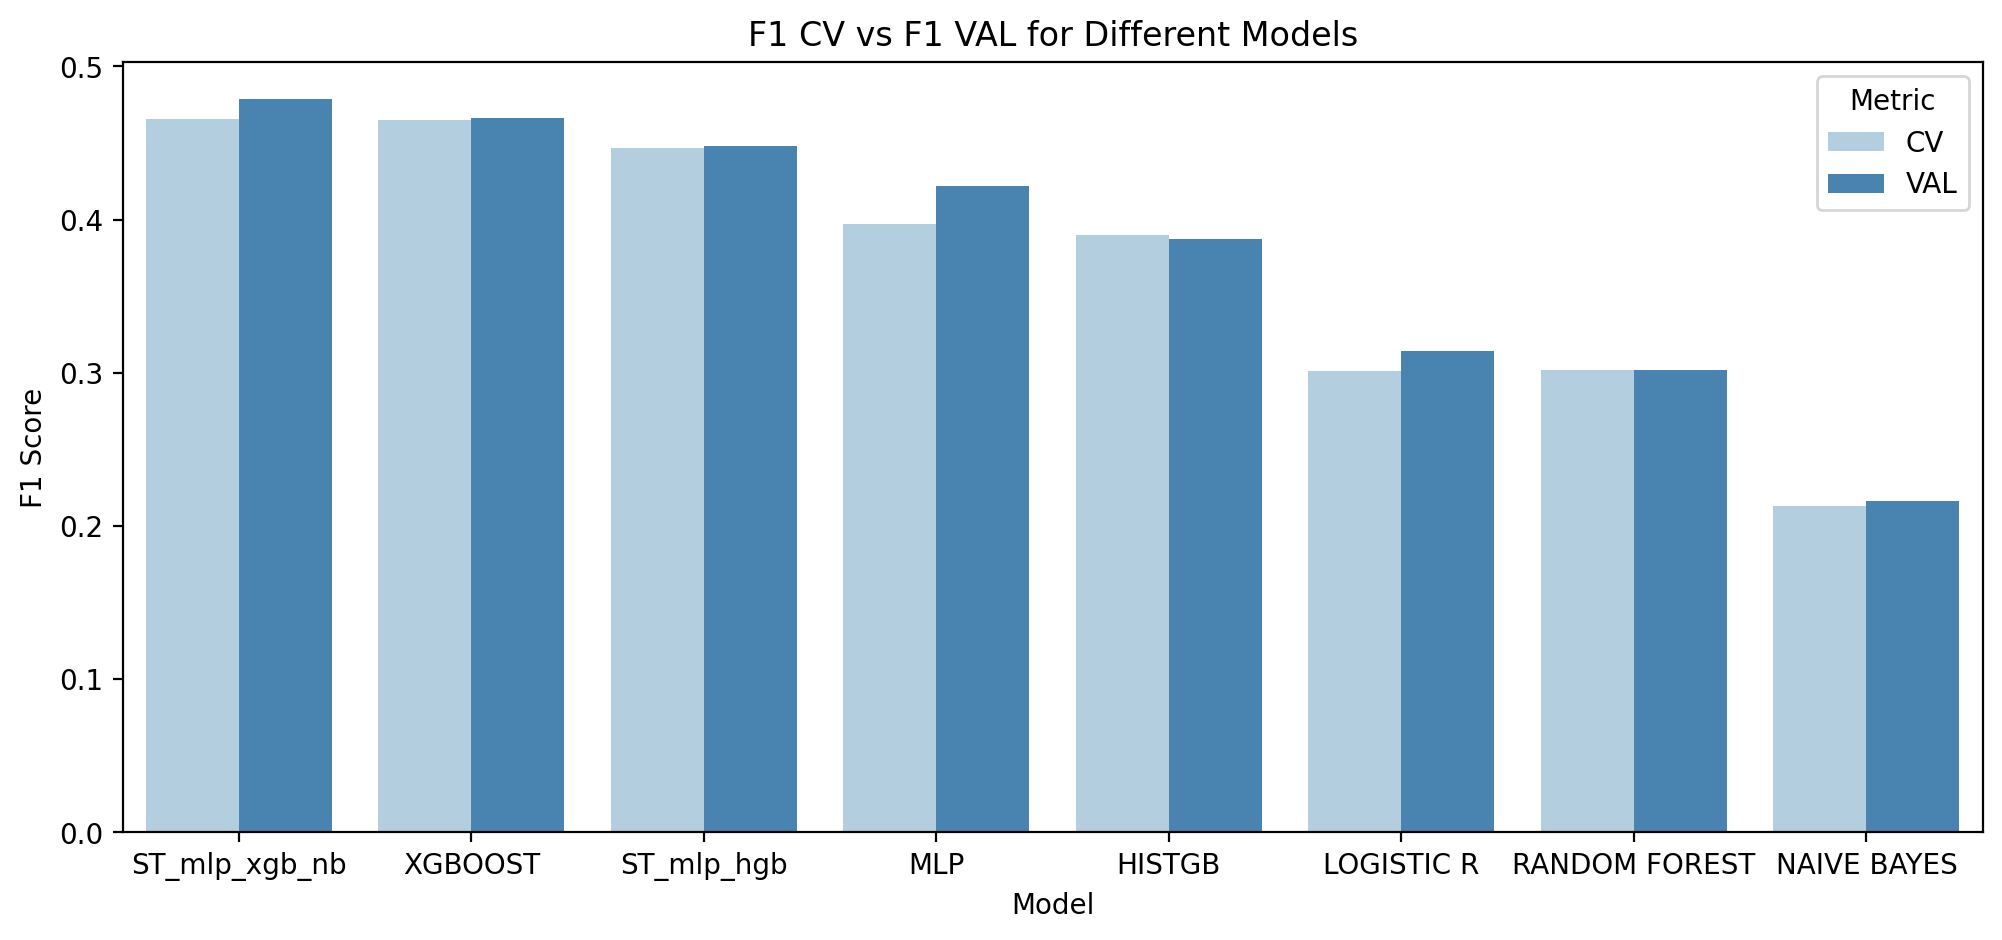

In [5]:
# Plot the results
plt.figure(figsize=(12, 5))
sns.barplot(data=df_melted, x='Model', y='F1 Score', hue='Metric', palette='Blues')

# Add labels and title
plt.title('F1 CV vs F1 VAL for Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

# Show the plot
plt.show()


END!!!